# __CarEase Customer Lifetime Value Prediction__

<div style="text-align: center;">
    <img src="https://business.trustedshops.com/hubfs/1-TS_B2B/content/uk/20230228-customer-lifetime-value/cw-customer-lifetime-value-w720h405.jpg" alt="CLV" style="width: 500px;" />
</div>

<span style="font-size: 20px;"> __CarEase's Need__  </span>
<div><span style="font-size: 18px;"> <b>CarEase</b>, an auto insurance company, aims to enhance its customer relationship management and marketing strategies by predicting the Customer Lifetime Value (CLV) of its policyholders. CLV is a critical metric that estimates the total revenue a business can expect from a customer over the entire duration of their relationship. By accurately predicting CLV, CarEase can make informed decisions on customer segmentation, pricing strategies, and resource allocation.</span></div>
<br>
<div><span style="font-size: 18px;"> The objective of this project is to develop a robust predictive model that leverages historical customer data, including demographics, policy details, claim history, and interaction records, to estimate the CLV for each customer. This model will help CarEase identify high-value customers, optimize marketing efforts, and improve overall customer satisfaction and retention.</span></div>

## Directory, libararies and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Adjusting columns size and width

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)  # Adjust display width

In [3]:
# To download csv files

In [4]:
# Google Drive file ID
file_id = '16BU1OovDU9f2Iiwy-IUyfugvRz-4RHu-'
# Construct the direct download URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Send a GET request to the URL
response = requests.get(url)

# Save the content to a file
with open('AutoInsurance.csv', 'wb') as file:
    file.write(response.content)

print("CSV file downloaded successfully.")

CSV file downloaded successfully.


In [5]:
# Read the url into a DataFrame
data = pd.read_csv(url, engine='python')

## EDA and Cleaning
---

__Checking the first 5 rows of the data to have an understanding of the dataframes. Descriptive statistics is also carried out.__

In [6]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [12]:
print ("The number of rows are:", data.shape[0])
print ("The number of columns are:", data.shape[1])

The number of rows are: 9134
The number of columns are: 24


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [14]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [15]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [16]:
data[data.duplicated()]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [17]:
print(f'Features: {data.columns.tolist()}')
print(f'Missing Values: {data.isnull().values.sum()}')
print(f'Unique Values: \n\n{data.nunique()}')

Features: ['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']
Missing Values: 0
Unique Values: 

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim    

In [19]:
# Convert the datetime column to the short format
data['Effective To Date'] = pd.to_datetime(data['Effective To Date']).dt.strftime('%Y-%m-%d')

In [20]:
data.rename({'Customer Lifetime Value':'CLV'}, axis = 1, inplace = True)

In [21]:
data.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [27]:
# Extract the month name

# Convert the datetime column to datetime objects
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'], errors='coerce')

data['month_name'] = data['Effective To Date'].dt.strftime('%B')
print(data['month_name'].head())

0    February
1     January
2    February
3     January
4       March
Name: month_name, dtype: object


In [15]:
# Splitting data into numerical and categorical/objects columns

In [90]:
# Check the number of unique values (levels) and their counts in each categorical variable
# Function to return categorical columns with value counts less than a specified number
def filter_categorical_columns(df, threshold):
    categorical_columns = df.select_dtypes(include=['object', 'category', 'number'])
    filtered_columns = []
    for col in categorical_columns:
        if df[col].nunique() <= threshold:
            filtered_columns.append(col)
    
    # Create a DataFrame from the filtered columns
    filtered_df = df[filtered_columns]
    return filtered_df

In [95]:
threshold = 5
cat_col = filter_categorical_columns(data, threshold)
cat_col.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Medsize


In [93]:
# Numerical column
num_col = data.select_dtypes(include = np.number)

## **Numerical columns**

In [33]:
num_col.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [34]:
num_col.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [244]:
avg_clv = num_col['CLV'].mean()
avg_clv

8004.940474987081

### Univariate Analysis

---

__Now that our data is prepared, we proceed with univariate analysis, which involves examining each variable independently. The goal is to understand the distribution, central tendency, and spread of the data for each variable.__

In [76]:
# Describing the columns

In [67]:
for column in num_col.columns:
    print(f"Descriptive statistics for {column}:")
    print(num_col[column].describe())
    print("\n")

Descriptive statistics for CLV:
count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: CLV, dtype: float64


Descriptive statistics for Income:
count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64


Descriptive statistics for Monthly Premium Auto:
count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64


Descriptive statistics for Months Since Last Claim:
count    9134.000000
mean       15.097000
std        10.073257
min         0.000000
25%         6.000000
50%        14.000000
75%        23.000000
max        35.000000
Name: Months Since Last Claim, dtype: fl

In [59]:
# Plot boxplots
def plot_boxplots(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=dataframe[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

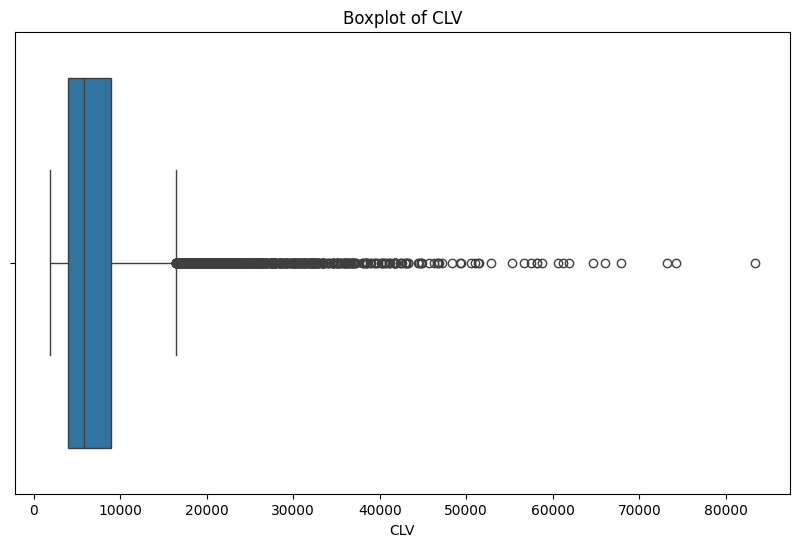

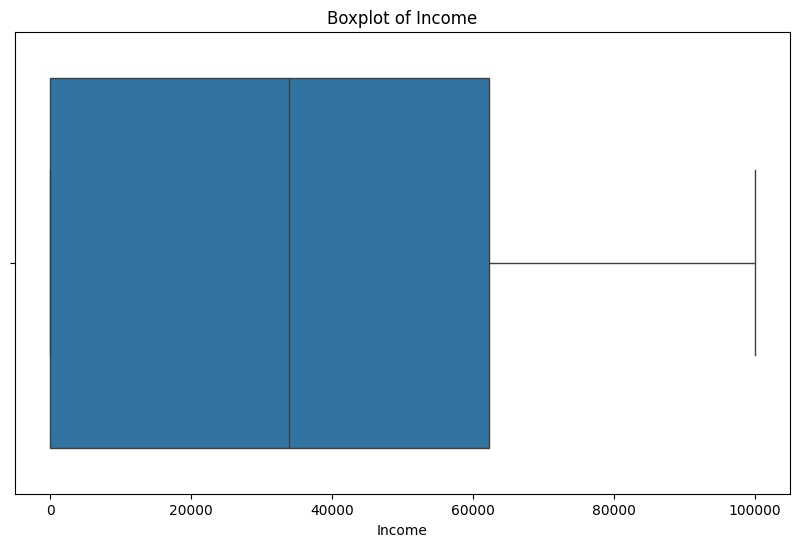

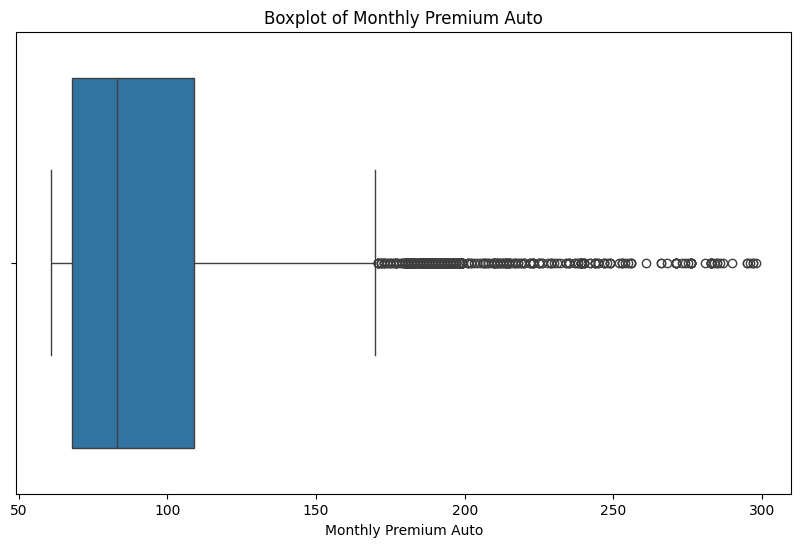

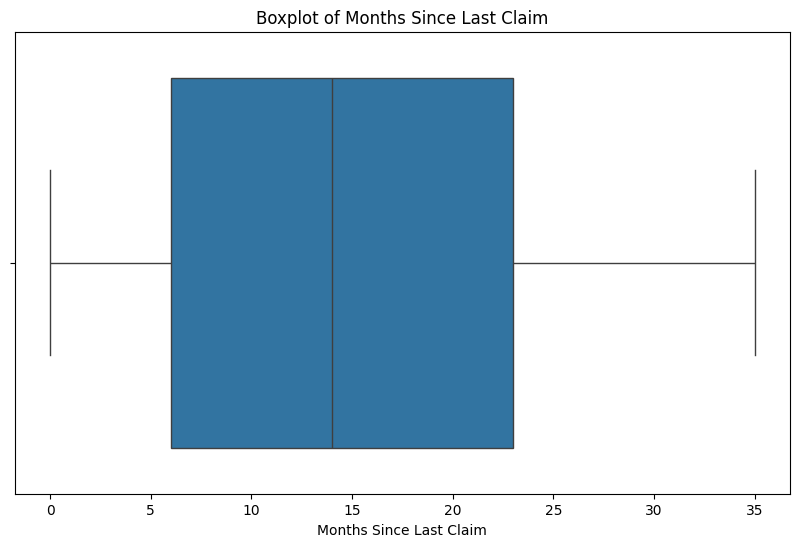

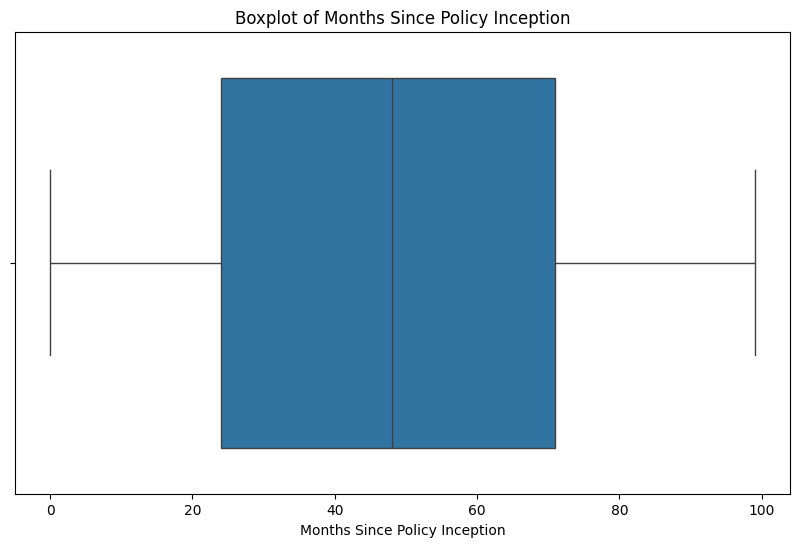

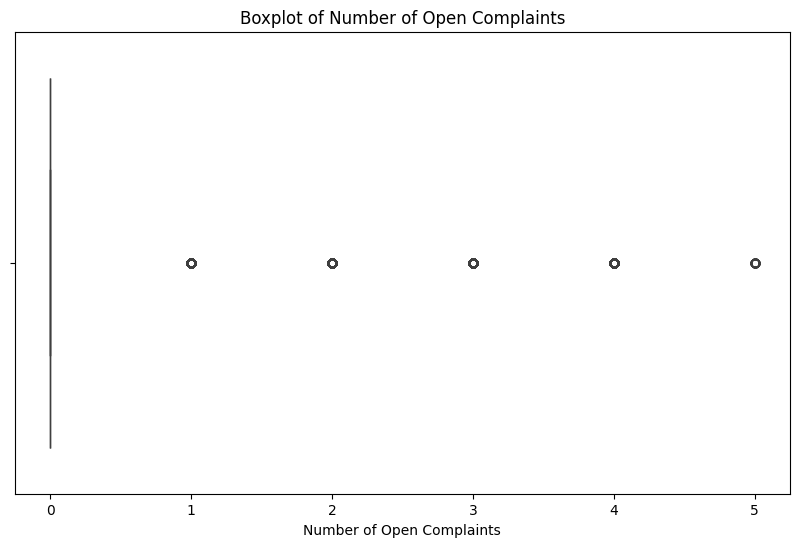

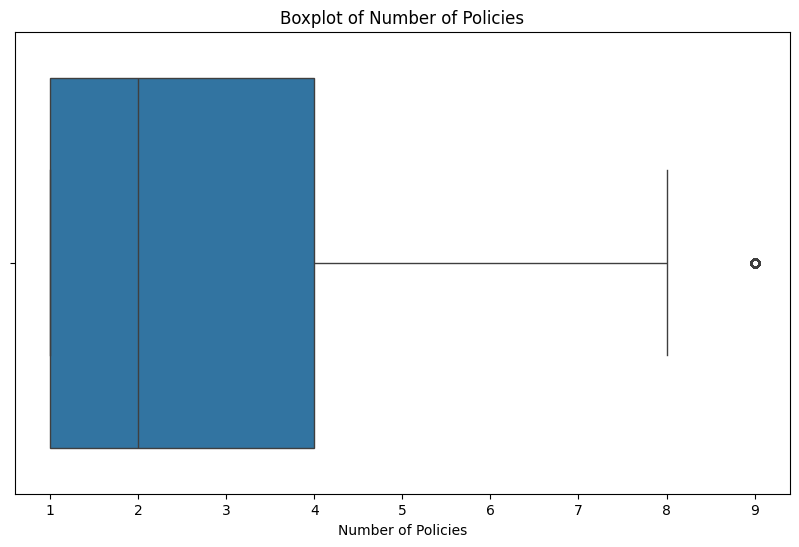

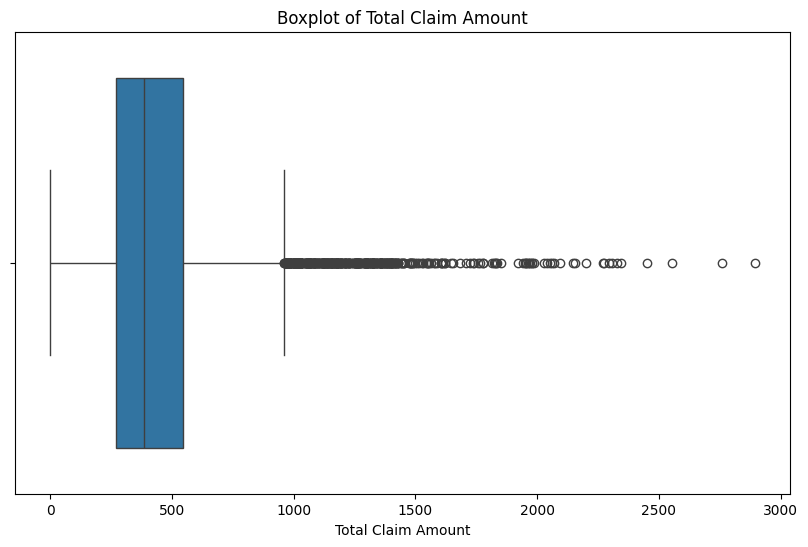

In [62]:
plot_boxplots(num_col)

In [64]:
# Plot displots
def plot_displots(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(10, 6))
        sns.displot(x=dataframe[column], kde = True)
        plt.title(f'Displot of {column}')
        plt.show()

<Figure size 1000x600 with 0 Axes>

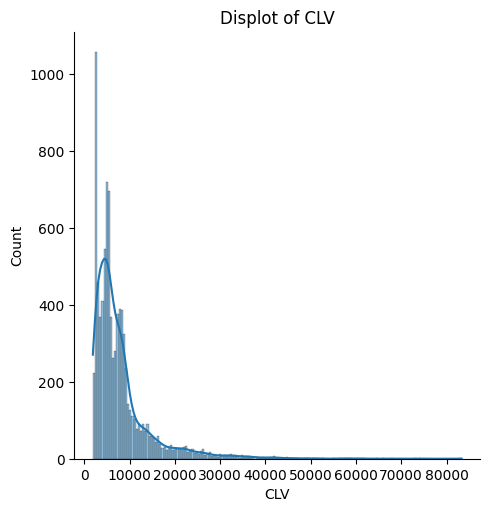

<Figure size 1000x600 with 0 Axes>

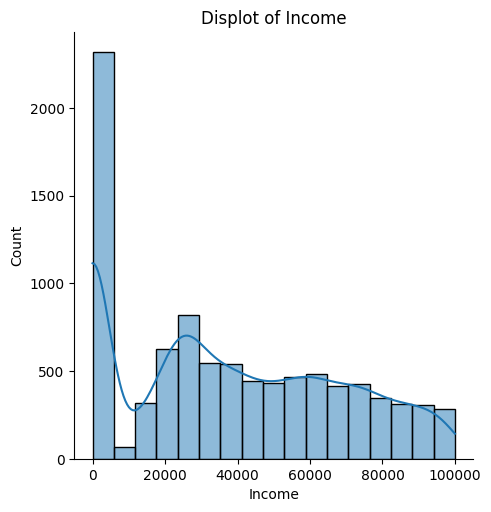

<Figure size 1000x600 with 0 Axes>

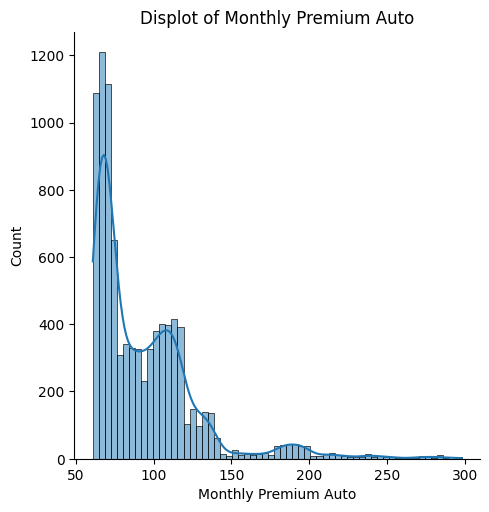

<Figure size 1000x600 with 0 Axes>

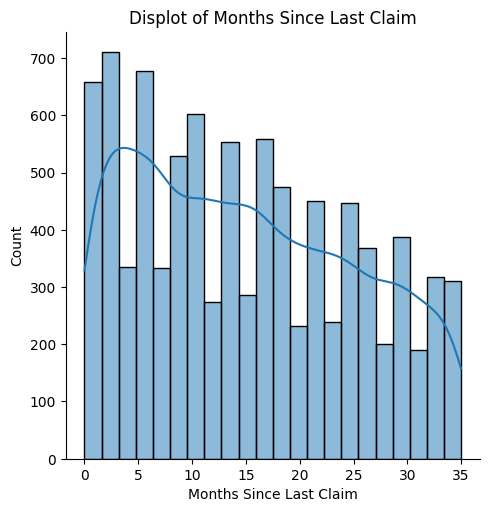

<Figure size 1000x600 with 0 Axes>

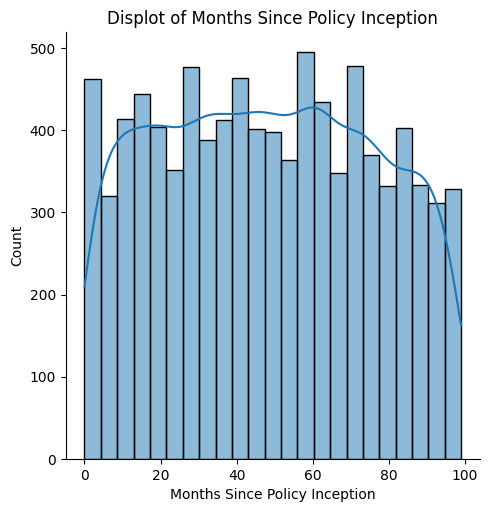

<Figure size 1000x600 with 0 Axes>

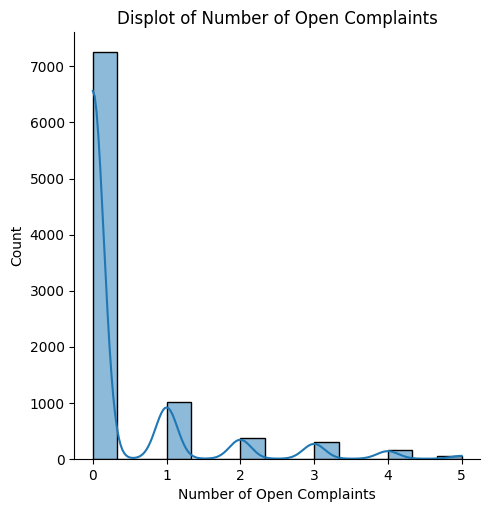

<Figure size 1000x600 with 0 Axes>

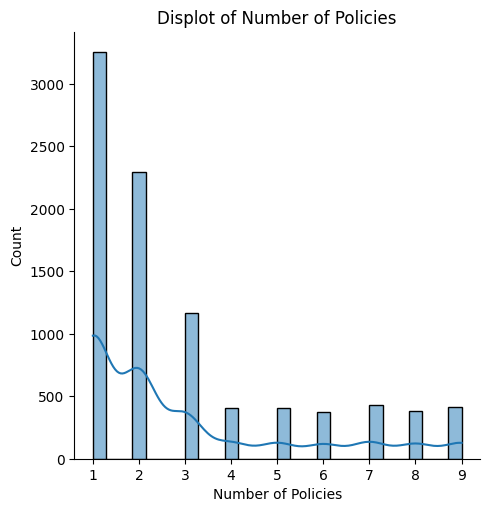

<Figure size 1000x600 with 0 Axes>

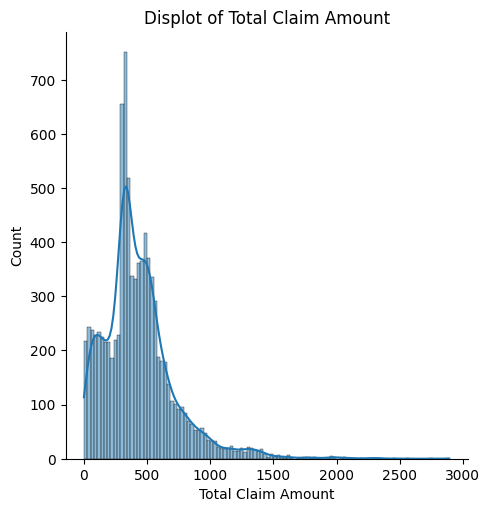

In [65]:
plot_displots(num_col)

In [71]:
# Showing skew

In [68]:
def check_skewness(dataframe):
    skewness_info = {}
    for column in dataframe.columns:
        skewness = dataframe[column].skew()
        if skewness > 0:
            skew_type = "right skewed"
        elif skewness < 0:
            skew_type = "left skewed"
        else:
            skew_type = "symmetrical"
        
        skewness_info[column] = {
            "skewness_value": skewness,
            "skew_type": skew_type
        }
    
    return skewness_info

In [69]:
skewness_results = check_skewness(num_col)
for column, info in skewness_results.items():
     print(f"The column '{column}' is {info['skew_type']} with a skewness value of {info['skewness_value']:.2f}.")

The column 'CLV' is right skewed with a skewness value of 3.03.
The column 'Income' is right skewed with a skewness value of 0.29.
The column 'Monthly Premium Auto' is right skewed with a skewness value of 2.12.
The column 'Months Since Last Claim' is right skewed with a skewness value of 0.28.
The column 'Months Since Policy Inception' is right skewed with a skewness value of 0.04.
The column 'Number of Open Complaints' is right skewed with a skewness value of 2.78.
The column 'Number of Policies' is right skewed with a skewness value of 1.25.
The column 'Total Claim Amount' is right skewed with a skewness value of 1.71.


In [ ]:
# Plot histplot

In [74]:
def dynamic_bins(data):
    # Using Freedman-Diaconis rule to calculate the number of bins
    q25, q75 = np.percentile(data, [25, 75])
    bin_width = 2 * (q75 - q25) * len(data) ** (-1/3)
    if bin_width == 0:  # Prevent division by zero
        bin_width = 1
    bins = int((data.max() - data.min()) / bin_width)
    # Ensure a reasonable number of bins
    bins = max(10, min(bins, 100))  # Adjust these values as needed
    return bins

def plot_histograms(dataframe):
    for column in dataframe.columns:
        data = dataframe[column].dropna()  # Drop NaN values for accurate bin calculation
        bins = dynamic_bins(data)
        plt.figure(figsize=(10, 6))
        sns.histplot(data, bins=bins, kde=True, color='blue')
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

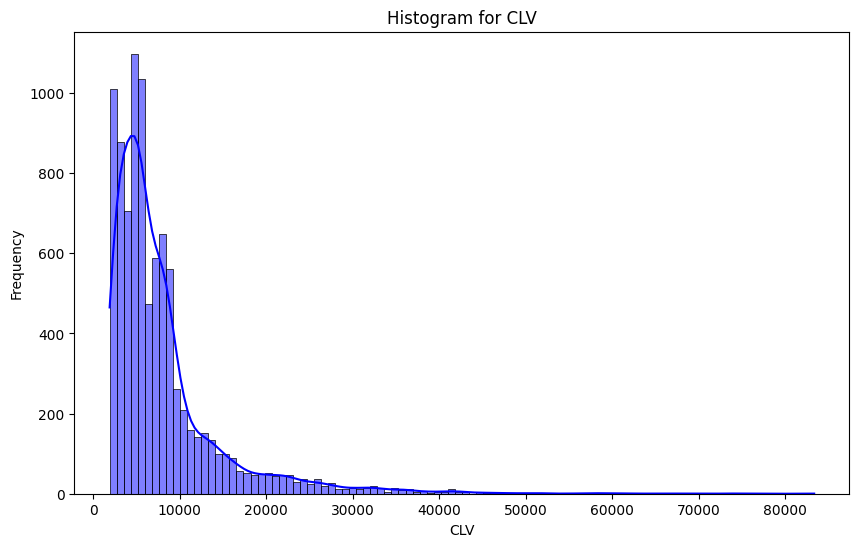

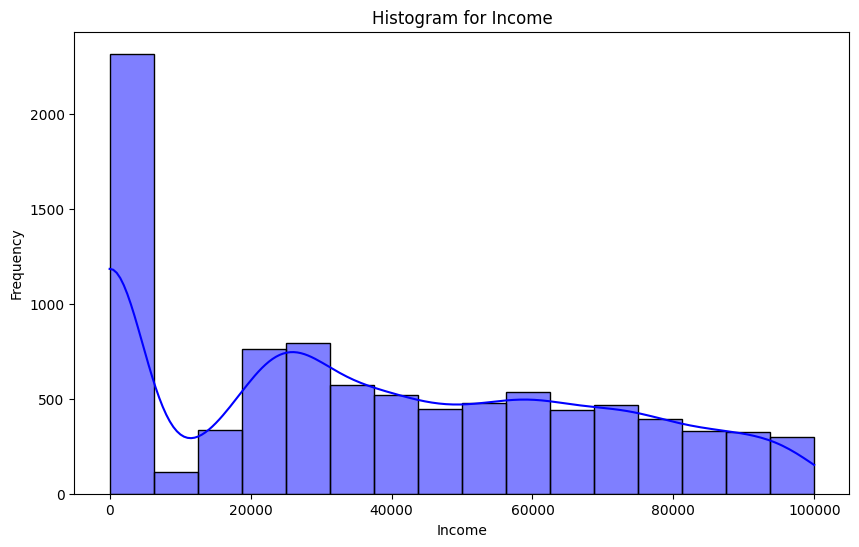

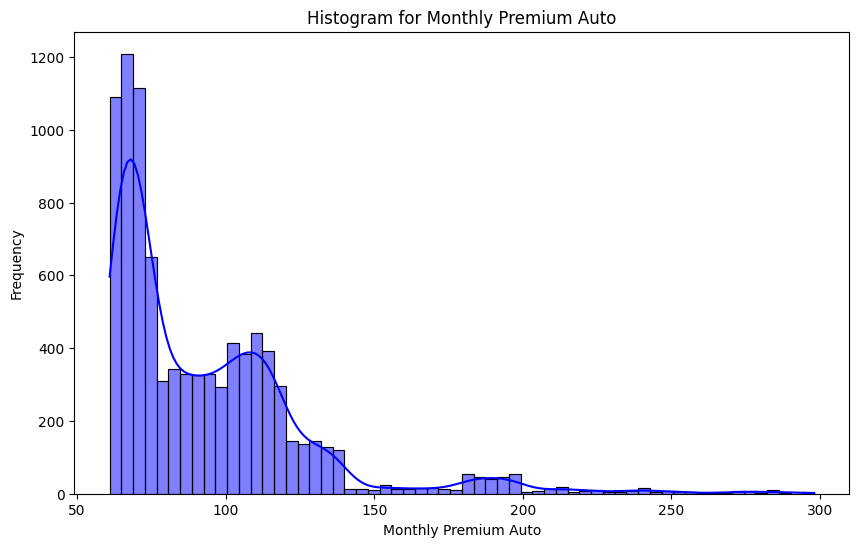

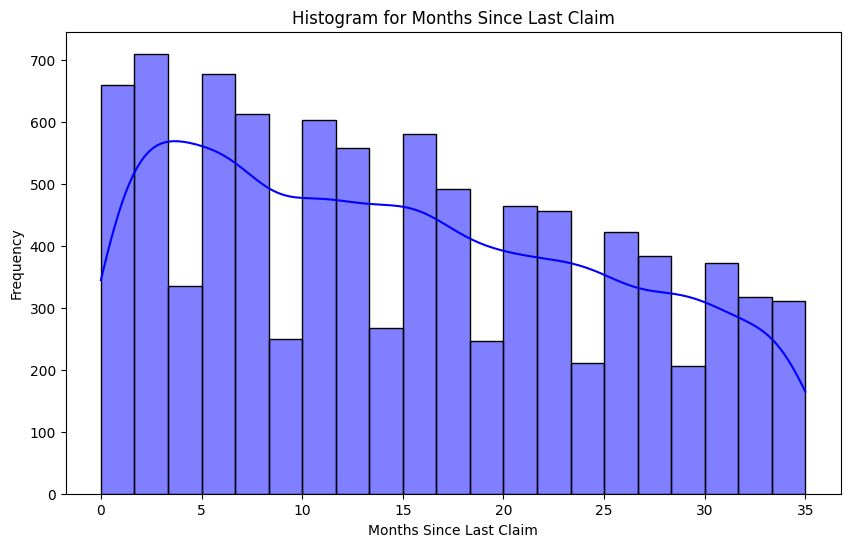

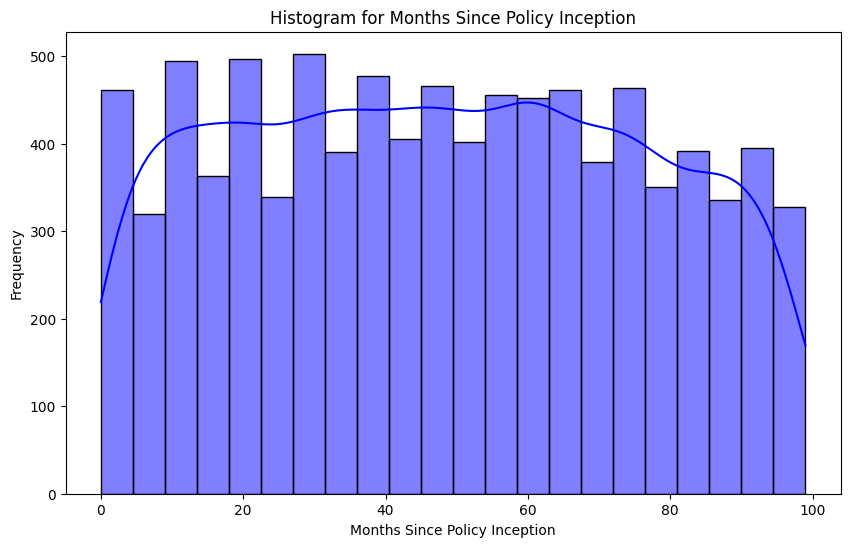

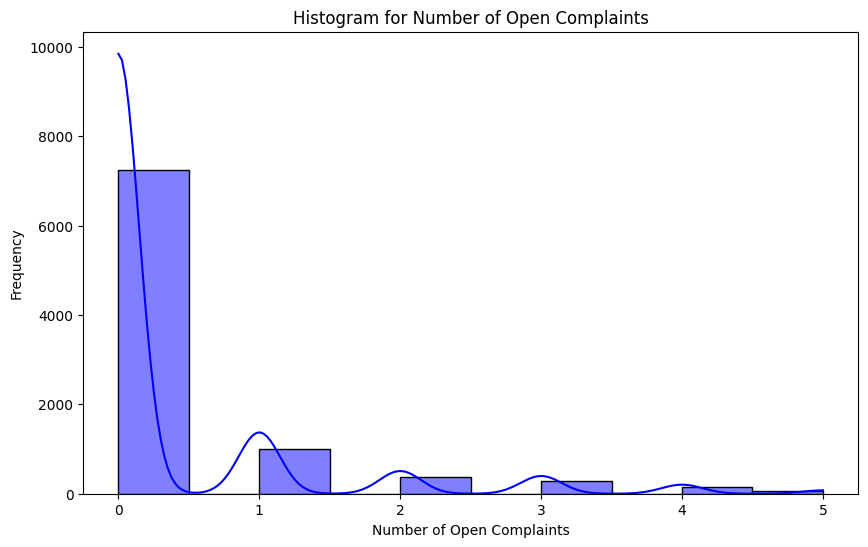

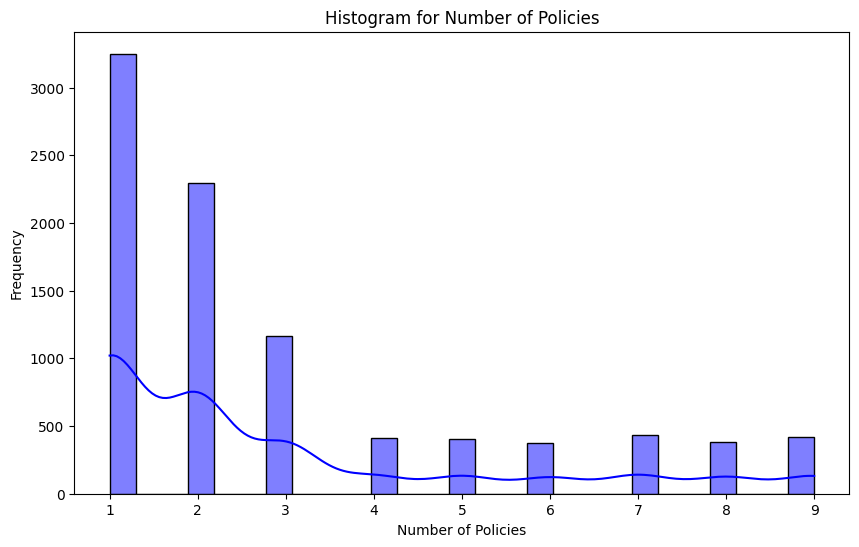

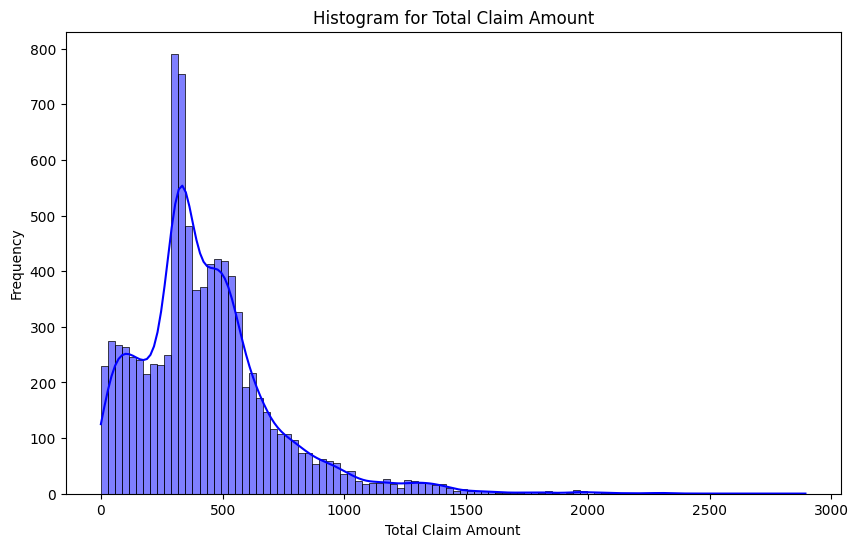

In [75]:
plot_histograms(num_col)

### Bivariate Analysis

---

Having examined the distribution of individual variables, we now move on to bivariate analysis. In this section, we explore the relationships between pairs of variables to uncover potential patterns and insights. This involves visualizing how different variables interact with each other, which can help us identify trends and areas for deeper analysis.

In [80]:
def check_linear_relationship(dataframe, target_column):
    linear_relationships = {}
    for column in dataframe.columns:
        if column != target_column:
            plt.figure(figsize=(8, 6))
            scatter_plot = sns.scatterplot(x=dataframe[column], y=dataframe[target_column], color='blue', s=100, alpha=0.6, edgecolor='w', linewidth=1)
            sns.regplot(x=dataframe[column], y=dataframe[target_column], scatter=False, color='red', ax=scatter_plot)
            plt.title(f'Scatter Plot of {column} vs {target_column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel(target_column, fontsize=12)
            plt.show()
            
            correlation = dataframe[column].corr(dataframe[target_column])
            if abs(correlation) > 0.1:  # You can adjust this threshold as needed
                relationship = "linear"
            else:
                relationship = "non-linear"
            
            linear_relationships[column] = {
                "correlation_coefficient": correlation,
                "relationship": relationship
            }
    
    return linear_relationships

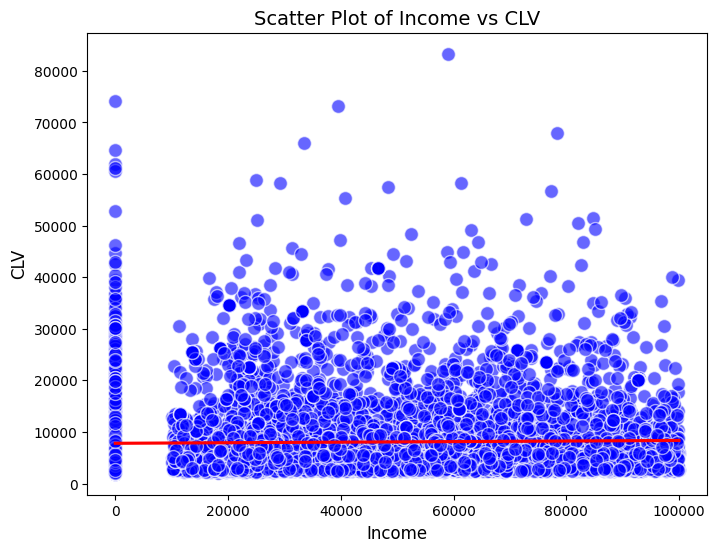

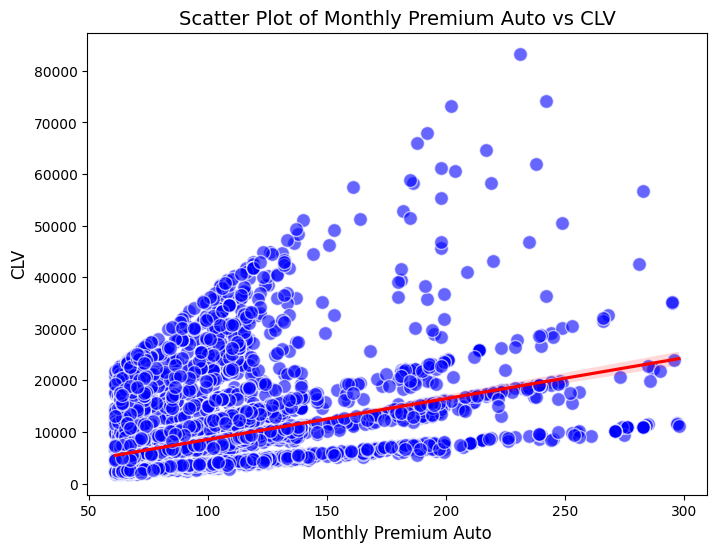

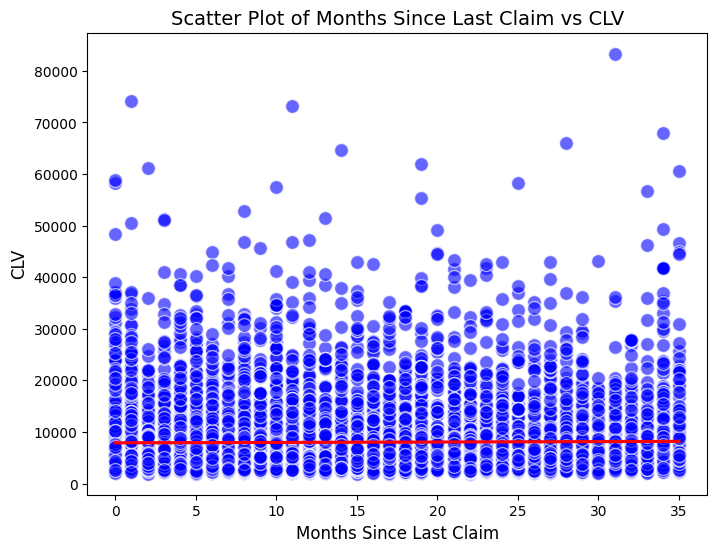

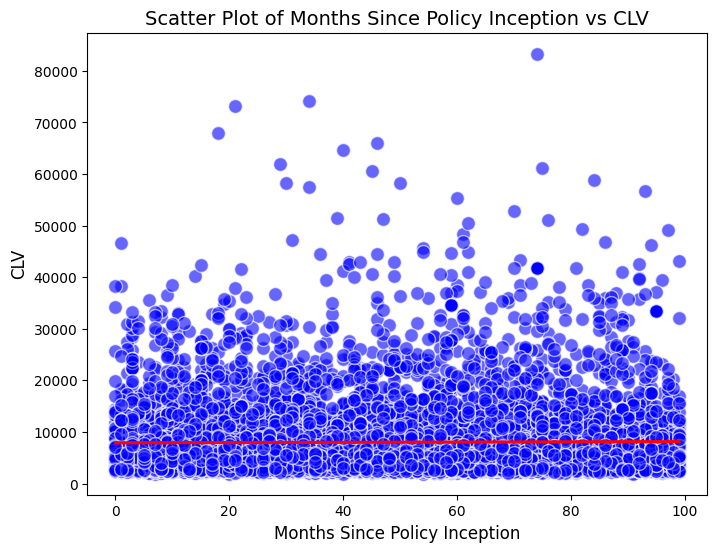

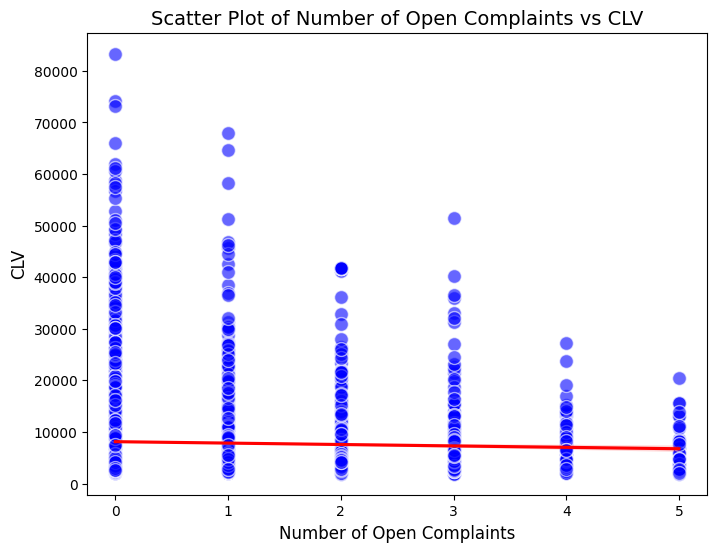

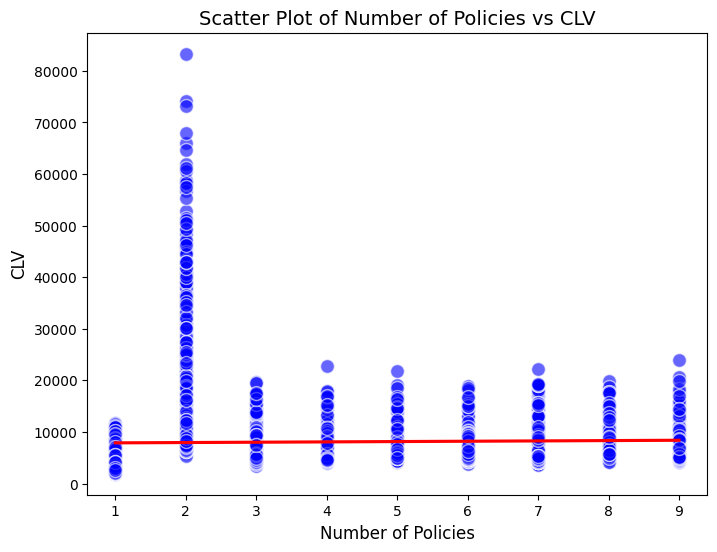

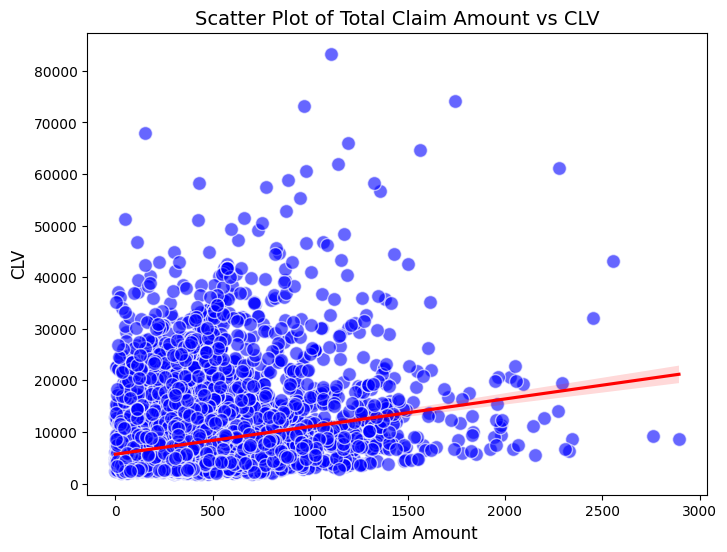

In [82]:
linear_relationships = check_linear_relationship(num_col, "CLV")

In [83]:
for column, info in linear_relationships.items():
     print(f"The relationship between '{column}' and 'CLV' is {info['relationship']} with a correlation coefficient of {info['correlation_coefficient']:.2f}.")

The relationship between 'Income' and 'CLV' is non-linear with a correlation coefficient of 0.02.
The relationship between 'Monthly Premium Auto' and 'CLV' is linear with a correlation coefficient of 0.40.
The relationship between 'Months Since Last Claim' and 'CLV' is non-linear with a correlation coefficient of 0.01.
The relationship between 'Months Since Policy Inception' and 'CLV' is non-linear with a correlation coefficient of 0.01.
The relationship between 'Number of Open Complaints' and 'CLV' is non-linear with a correlation coefficient of -0.04.
The relationship between 'Number of Policies' and 'CLV' is non-linear with a correlation coefficient of 0.02.
The relationship between 'Total Claim Amount' and 'CLV' is linear with a correlation coefficient of 0.23.


__Number of Open Complaints and Number of Policies are columns with discrete number and will be assigned as a categorical data.__

In [84]:
num_col.drop(['Number of Policies', 'Number of Open Complaints'], 
              axis = 1, inplace =True)

In [85]:
# Heatmap

<Axes: >

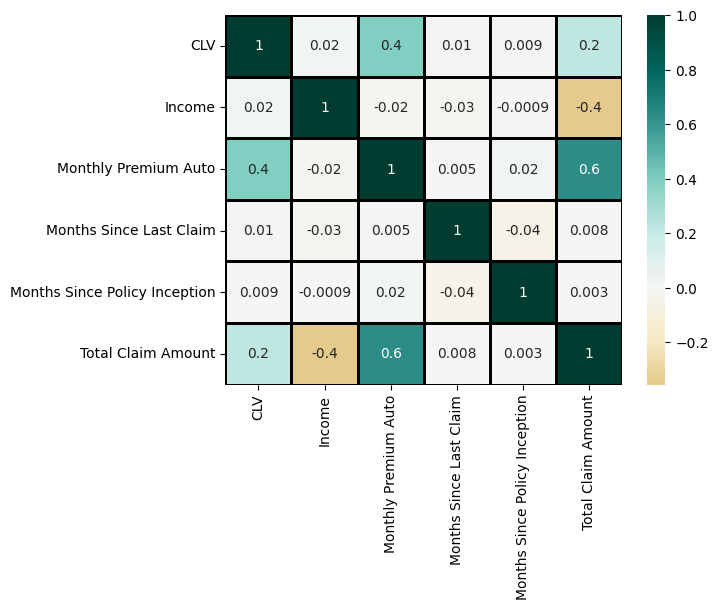

In [86]:
df_corr = num_col.corr()

# Vizualizing it

sns.heatmap(df_corr, annot=True, fmt='.1g',
            center=0, cmap='BrBG', linewidths= 1,
            linecolor='black')

__Monthly Premium Auto and Total Claim Amount have considerable correlation with CLV__

## **Categorical columns**

In [106]:
data.head()

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month_name
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,February
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,January
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,February
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,January
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,March


In [107]:
data = data.copy()
cat_col['Number of Policies'] = data['Number of Policies']
cat_col['Number of Open Complaints'] = data['Number of Open Complaints']
cat_col['month_name'] = data['month_name']

In [108]:
cat_col.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Size',
       'Number of Policies', 'Number of Open Complaints', 'month_name'],
      dtype='object')

### Univariate EDA

In [109]:
# Unique Values of the categorical columns

In [110]:
for column in cat_col.columns:
    print(f"Unique Values for {column}:")
    print(cat_col[column].unique())
    print("\n")

Unique Values for State:
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']


Unique Values for Response:
['No' 'Yes']


Unique Values for Coverage:
['Basic' 'Extended' 'Premium']


Unique Values for Education:
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


Unique Values for EmploymentStatus:
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']


Unique Values for Gender:
['F' 'M']


Unique Values for Location Code:
['Suburban' 'Rural' 'Urban']


Unique Values for Marital Status:
['Married' 'Single' 'Divorced']


Unique Values for Policy Type:
['Corporate Auto' 'Personal Auto' 'Special Auto']


Unique Values for Renew Offer Type:
['Offer1' 'Offer3' 'Offer2' 'Offer4']


Unique Values for Sales Channel:
['Agent' 'Call Center' 'Web' 'Branch']


Unique Values for Vehicle Size:
['Medsize' 'Small' 'Large']


Unique Values for Number of Policies:
[1 8 2 7 9 4 3 6 5]


Unique Values for Number of Open Complaints:
[0 2 1 3 5 4]


Unique Values for month_name:
[

In [111]:
# Distribution of customers by categorical columns

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distributions(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(10, 6))
        res_dist = dataframe[column].value_counts()
        res_dist.plot(kind='bar', color='skyblue')
        plt.xticks(rotation=360)
        plt.title(f"Distribution of customers by {column}")
        plt.xlabel(column)
        plt.show()

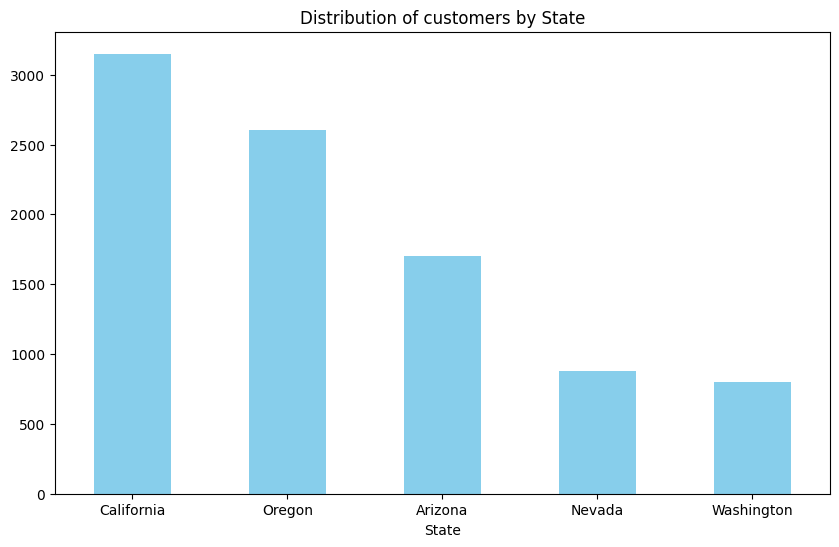

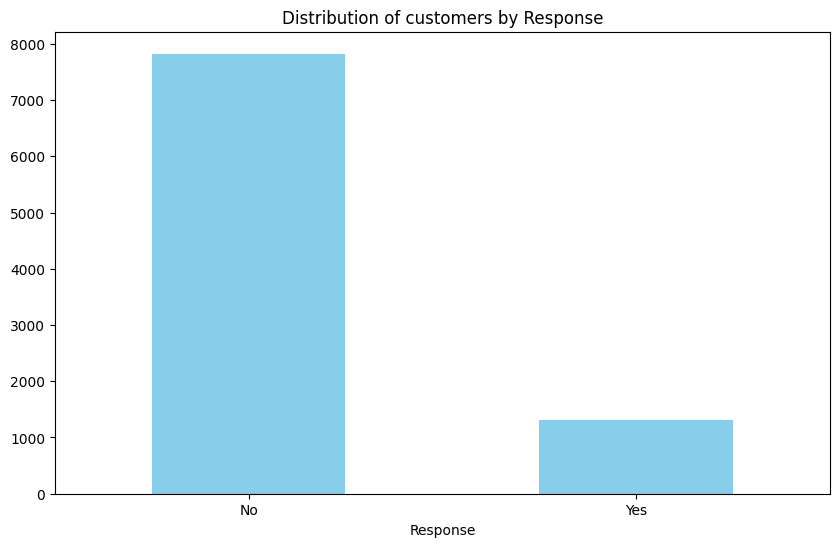

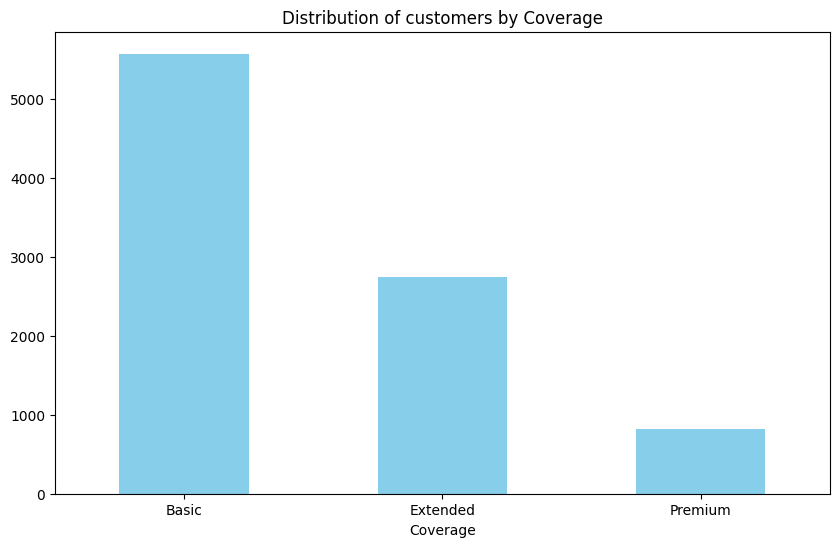

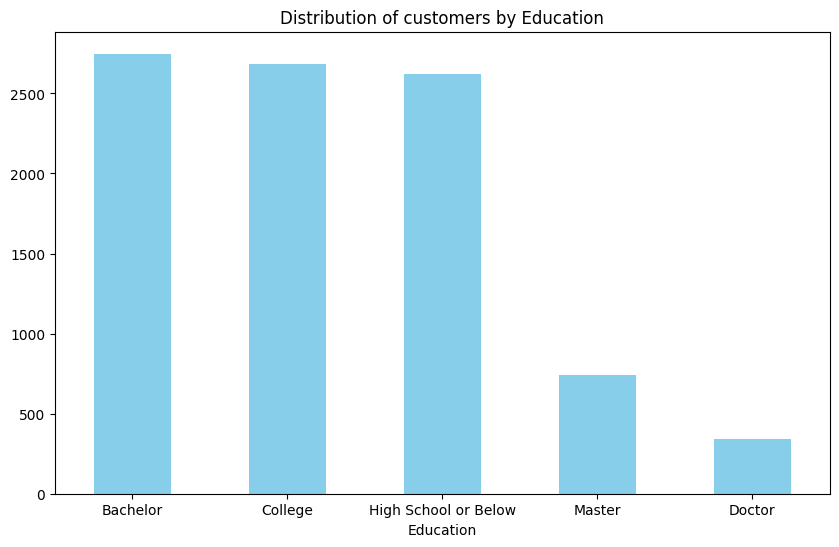

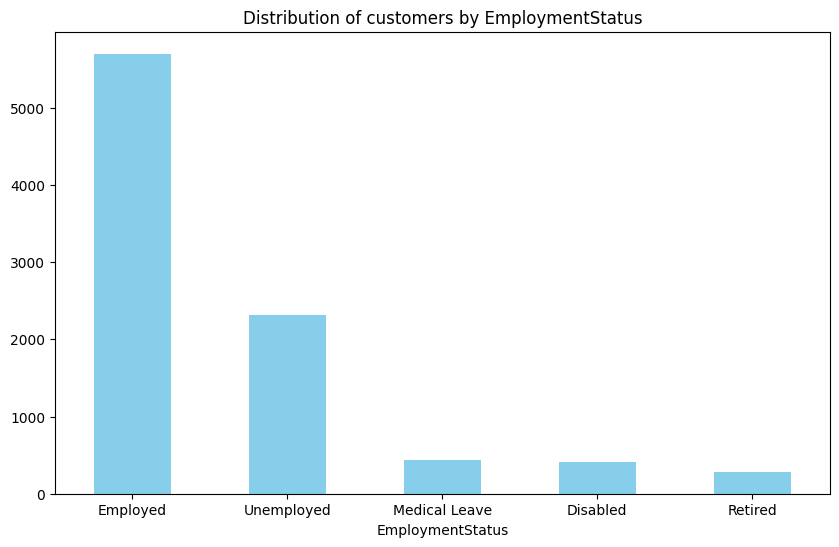

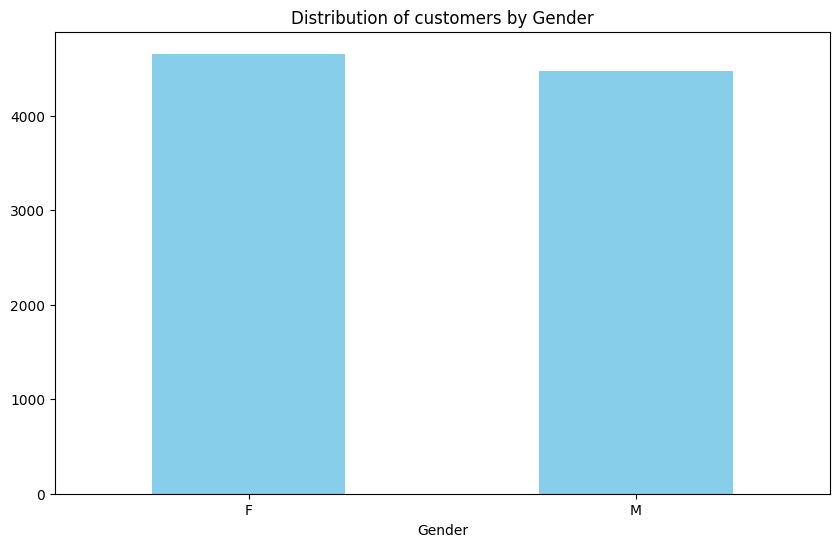

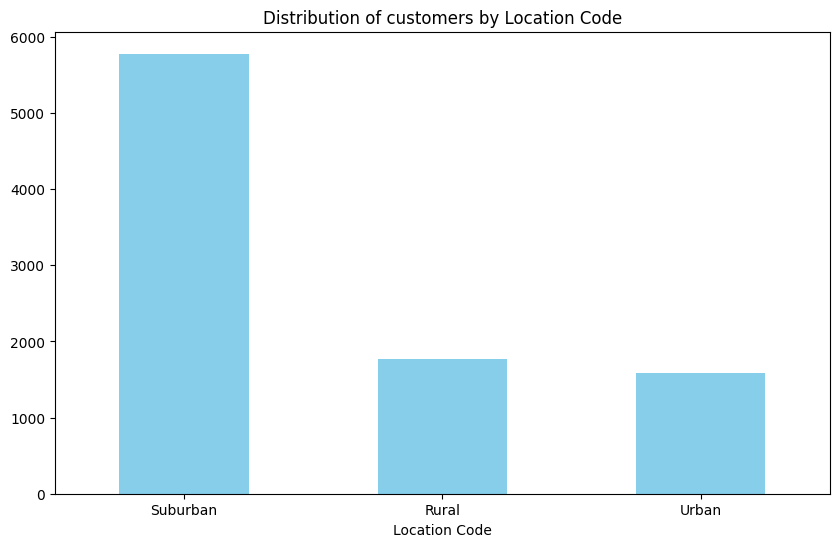

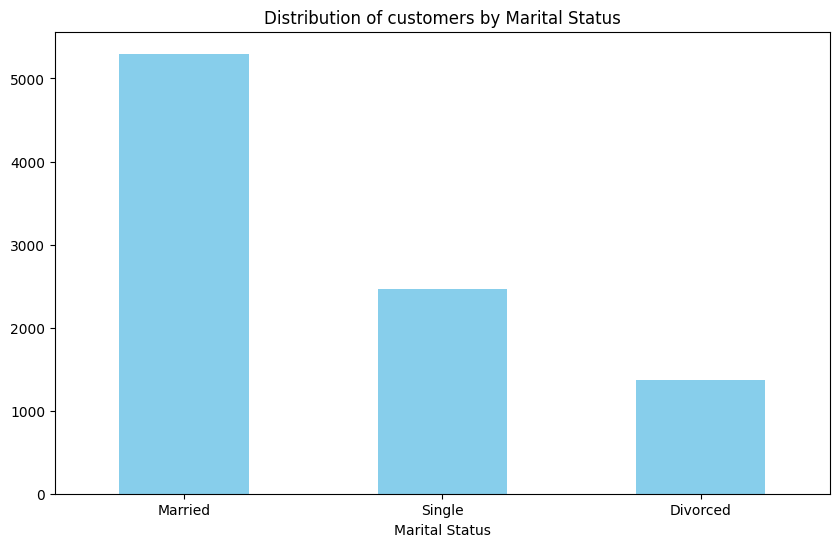

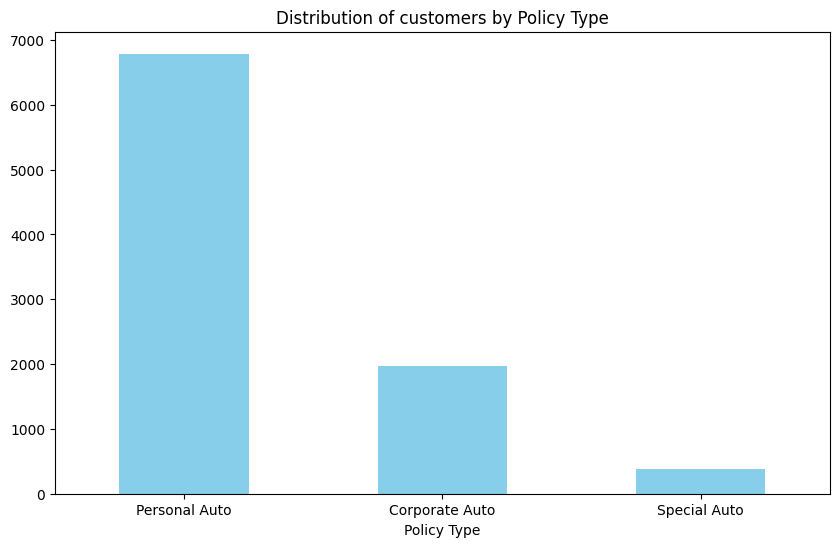

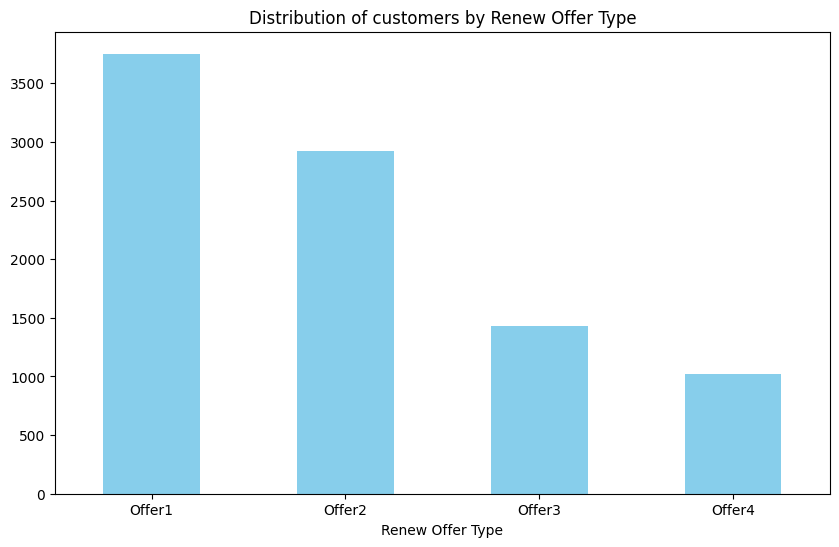

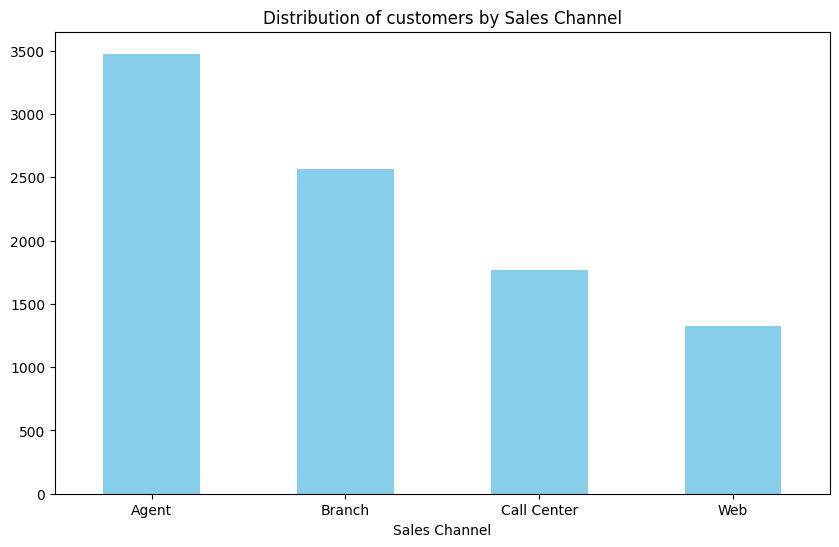

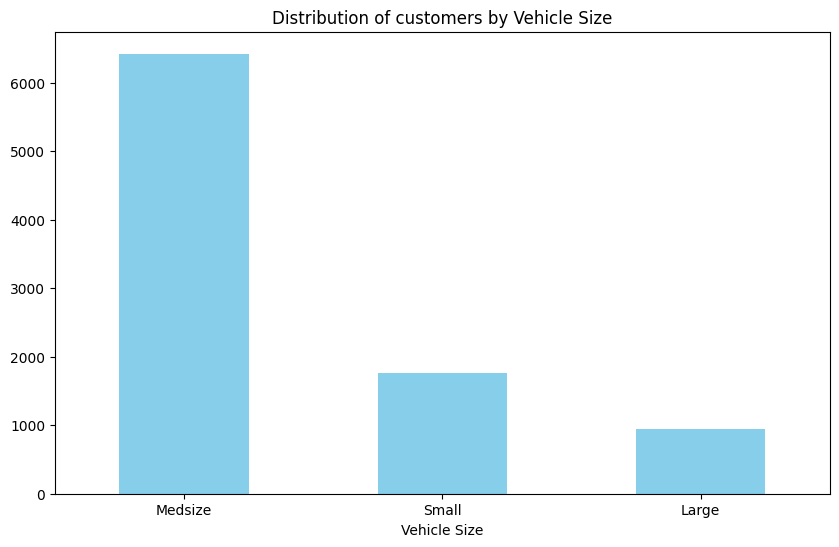

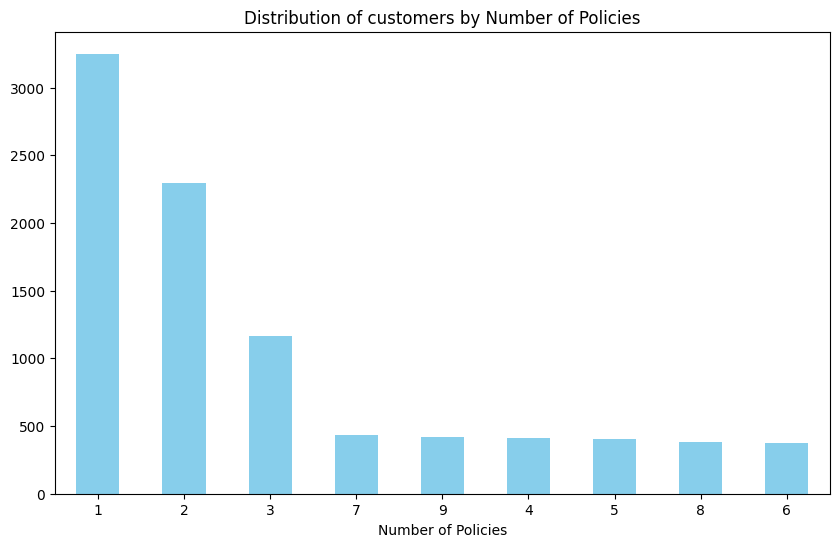

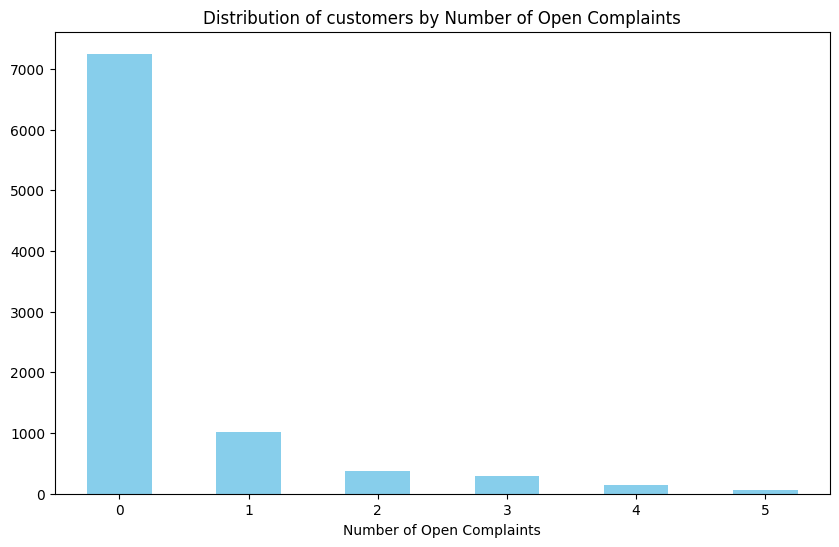

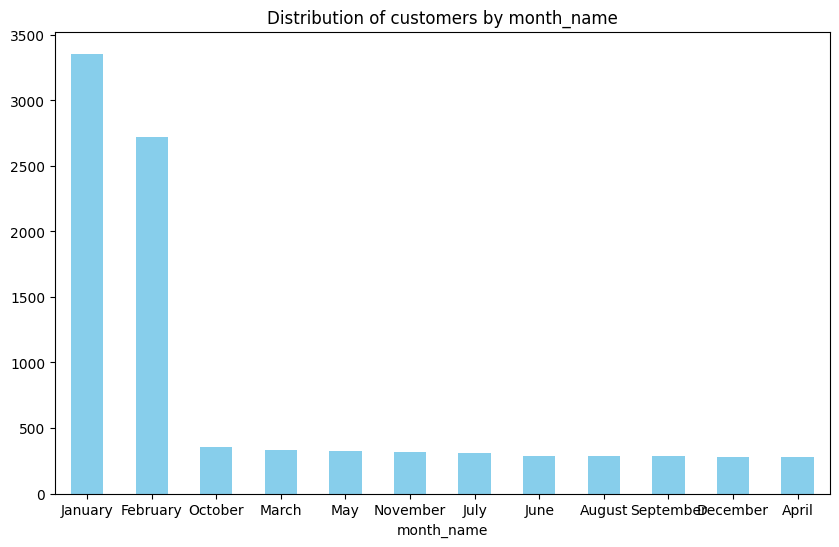

In [113]:
plot_categorical_distributions(cat_col)

### Bivariate EDA

In [116]:
def plot_avg_clv_by_all_categories(dataframe, cat_col_df):
    for column in cat_col_df.columns:
        avg_clv_by_category = dataframe.groupby(column)['CLV'].mean()
        sorted_avg_clv = avg_clv_by_category.sort_values()

        plt.figure(figsize=(10, 6))
        plt.bar(sorted_avg_clv.index, sorted_avg_clv.values, color='skyblue')
        plt.xlabel('Avg CLV')
        plt.title(f'Avg CLV by {column}')
        plt.show()

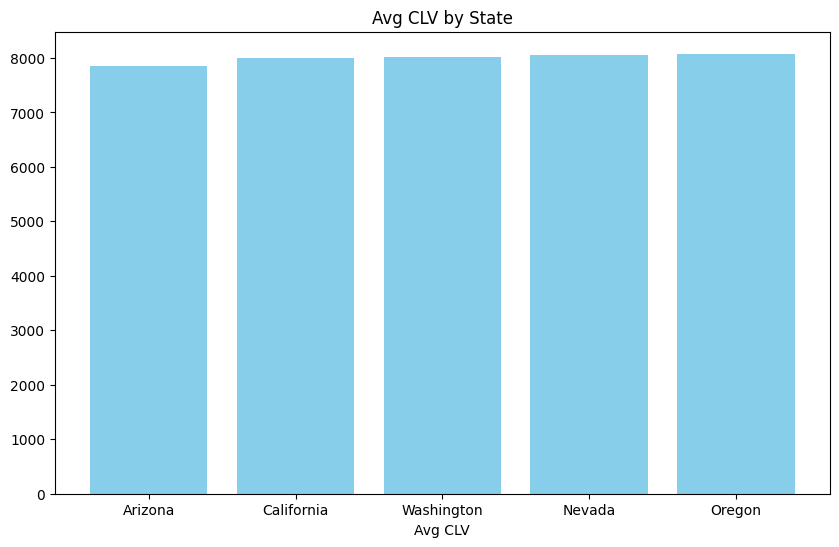

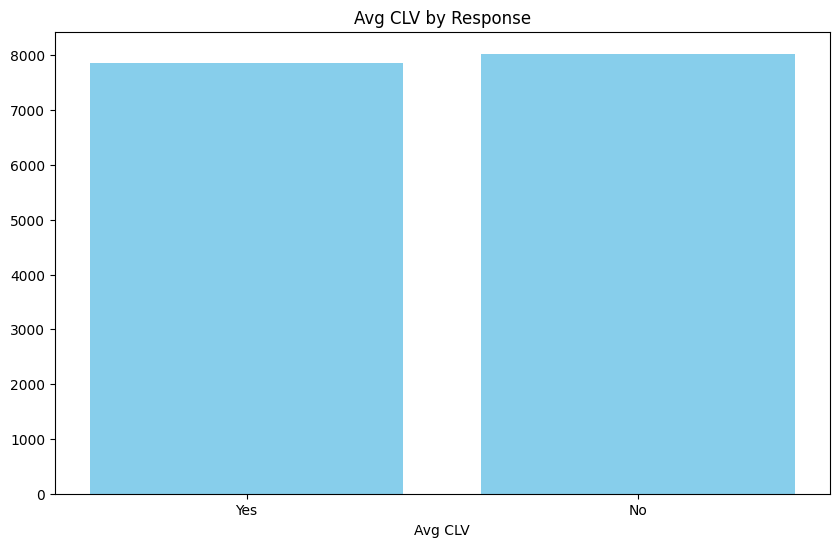

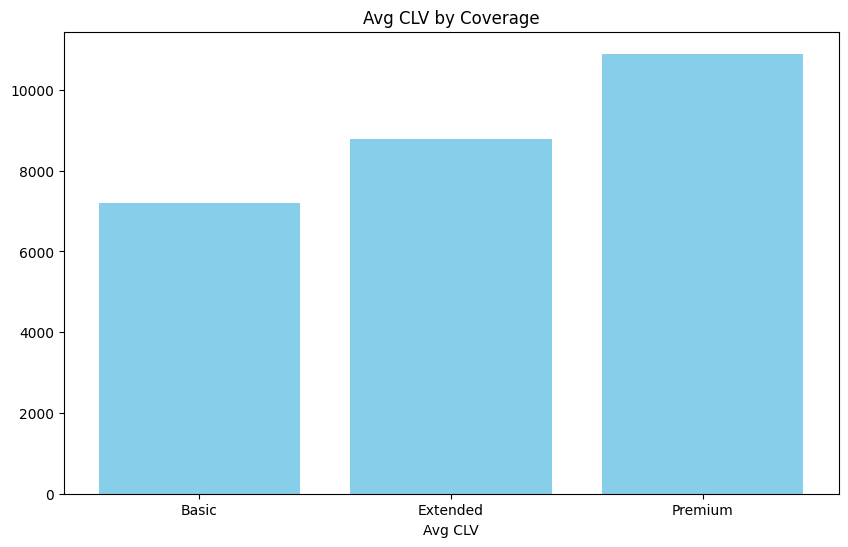

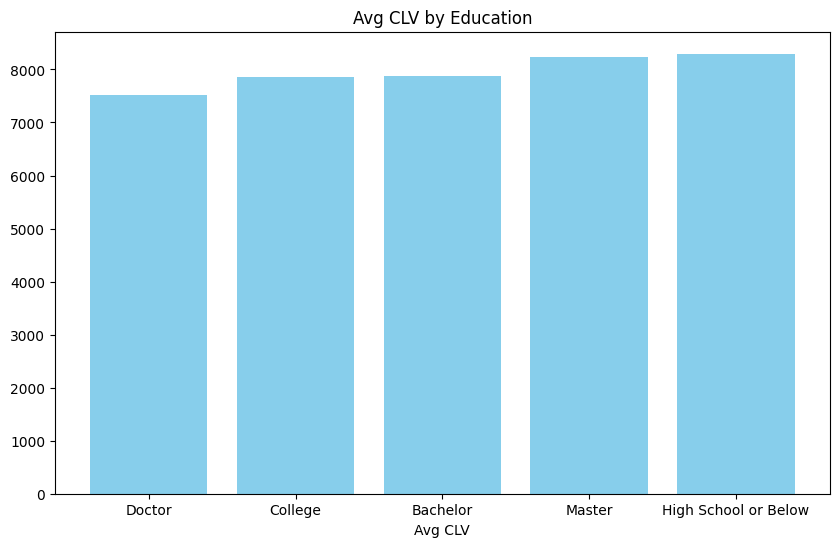

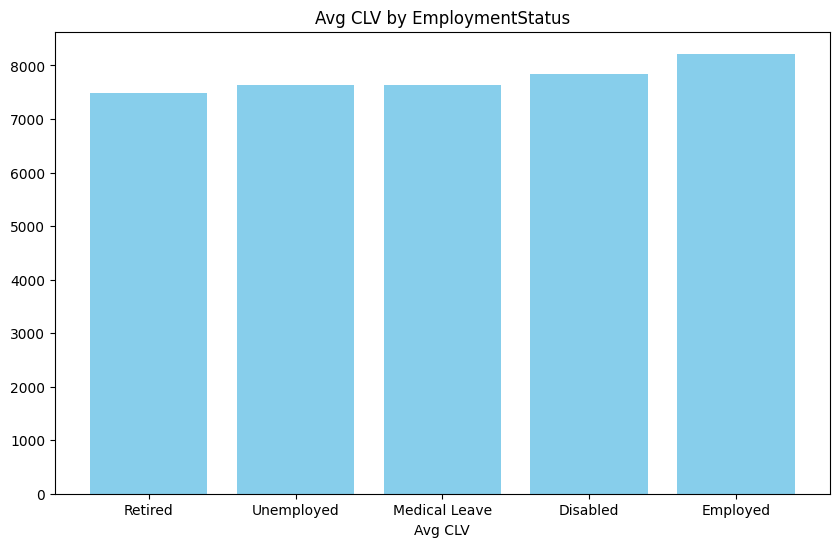

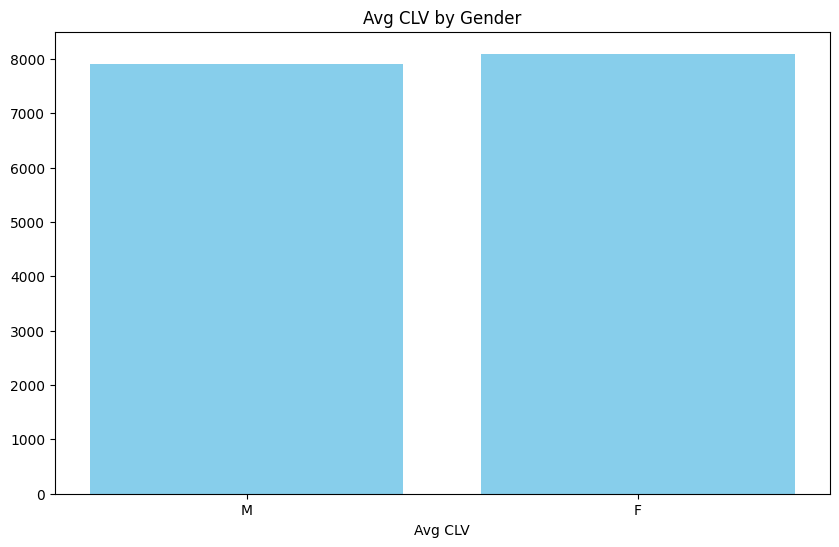

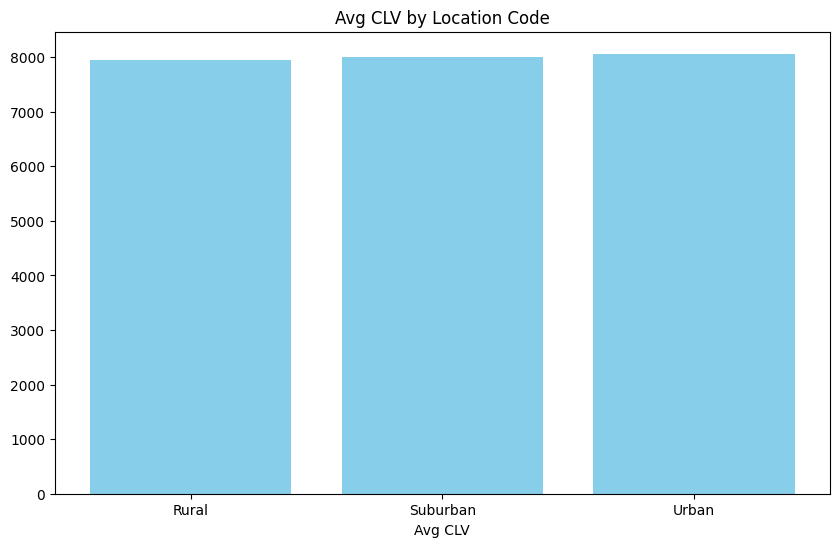

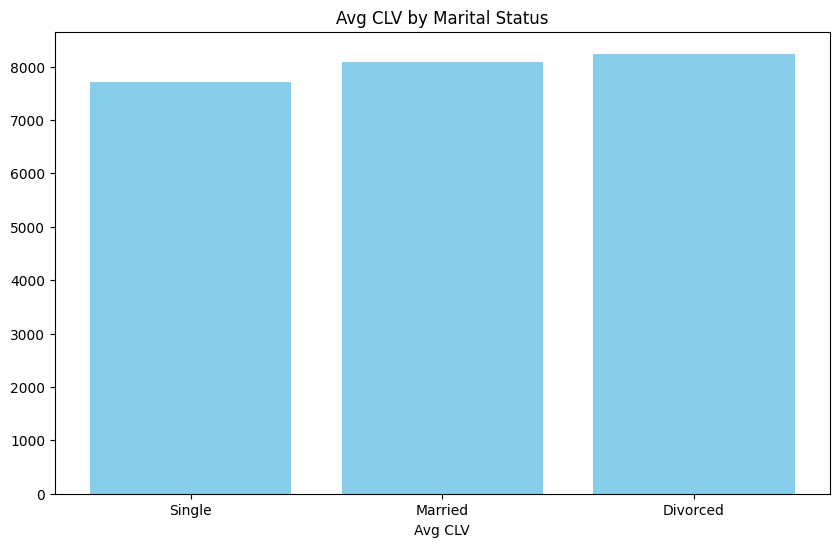

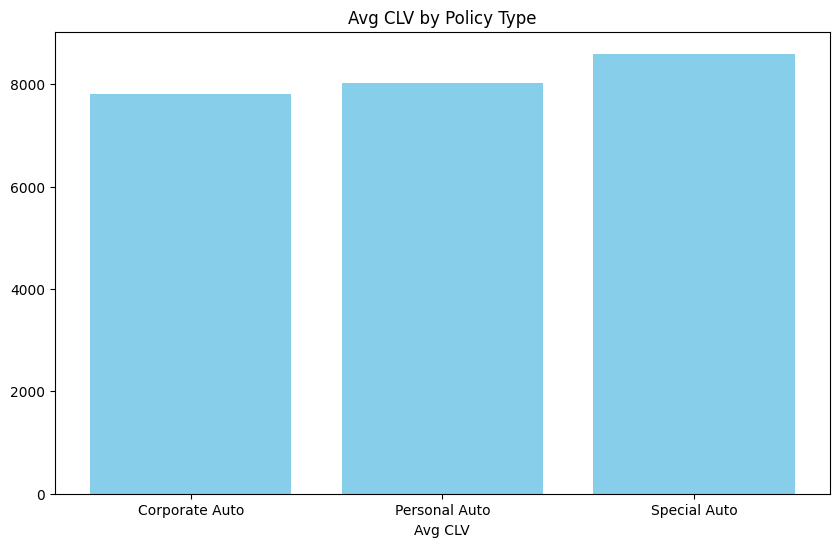

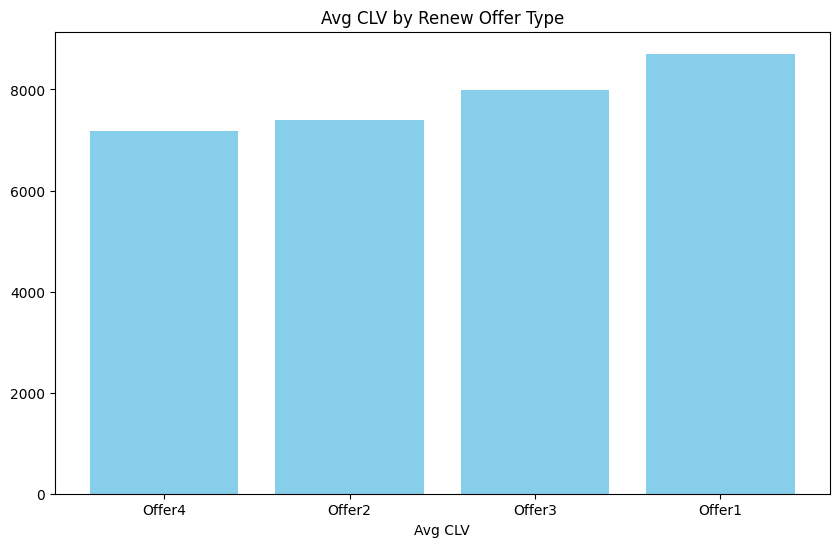

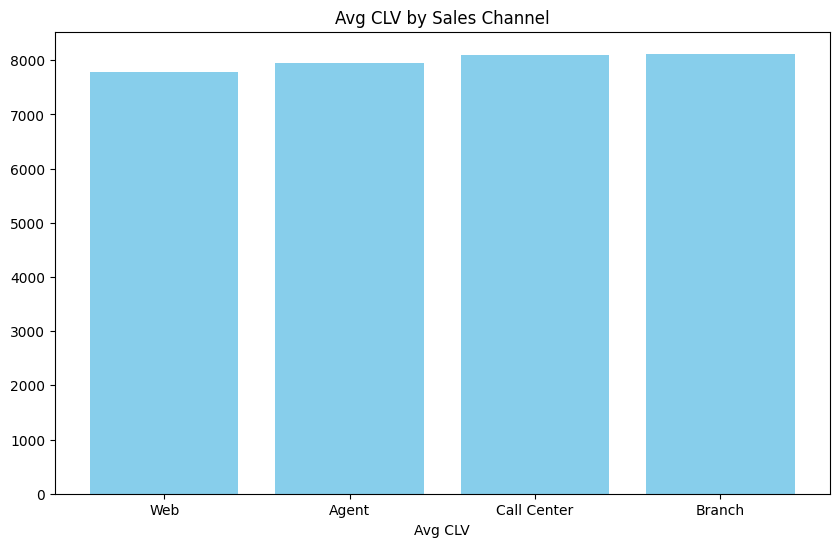

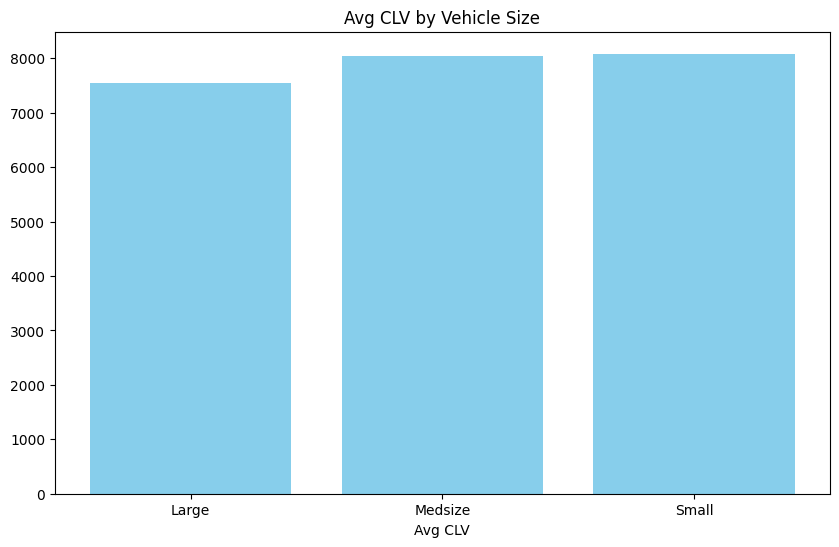

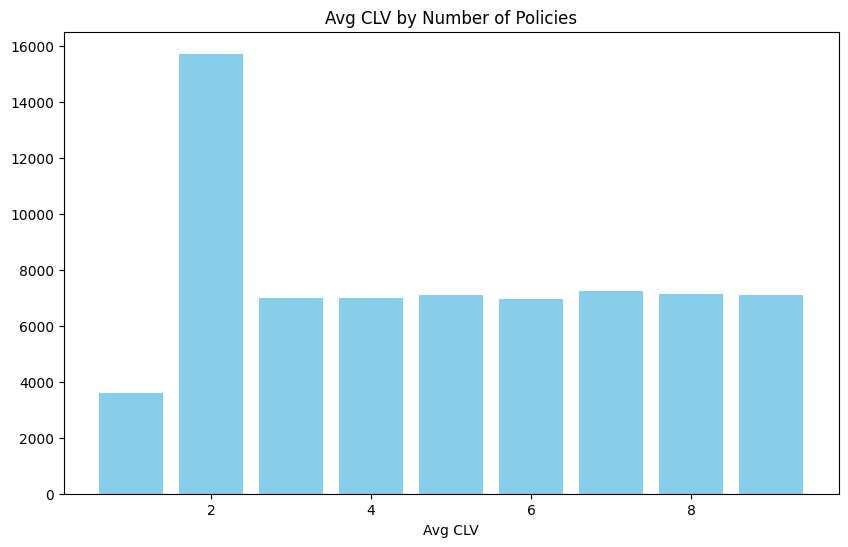

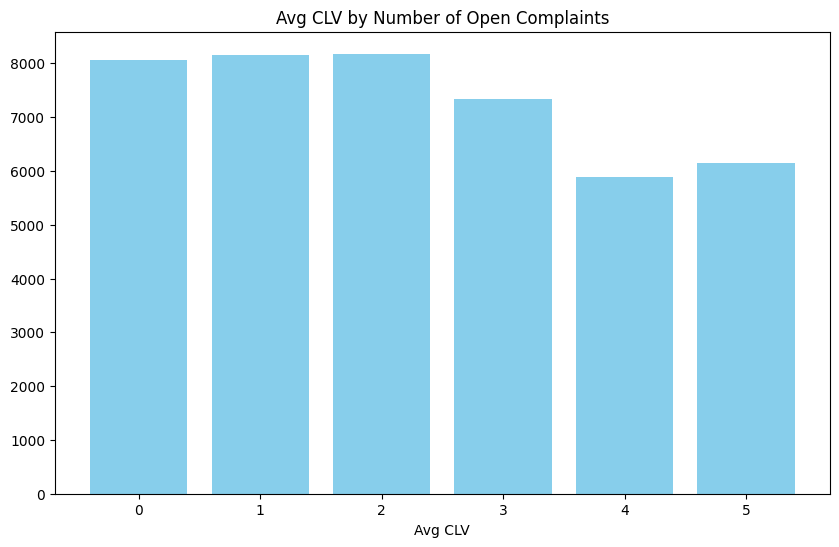

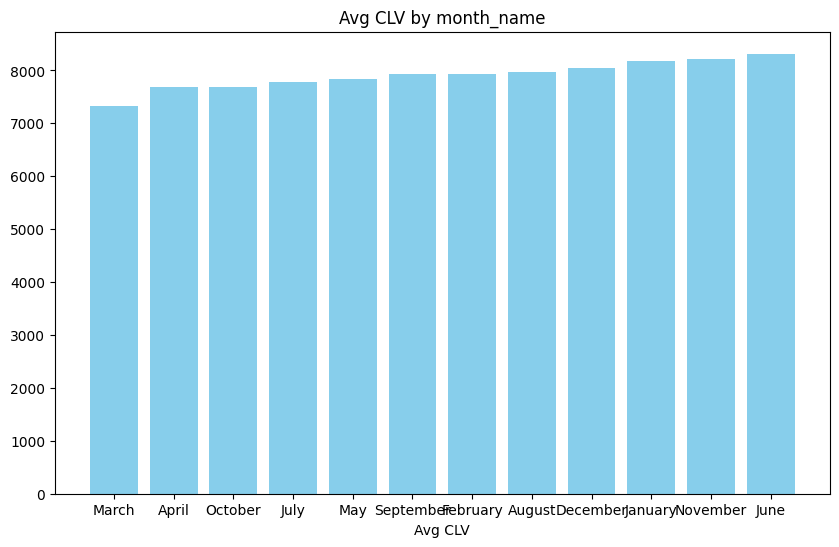

In [117]:
plot_avg_clv_by_all_categories(data, cat_col)

## Check Data Distribution

In [118]:
# Using Shapiro-Wilks test

In [119]:
from scipy.stats import shapiro, probplot

stat, p = shapiro(data['CLV'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Statistics=0.703, p=0.000
Data is not normally distributed


C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9134.
  res = hypotest_fun_out(*samples, **kwds)


In [120]:
# Due to the warning above, Kolmogorov-Smirnov Test is used instead of Shapiro-Wilks test

In [121]:
from scipy.stats import kstest

stat, p = kstest(data['CLV'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Statistics=1.000, p=0.000
Data is not normally distributed


In [122]:
# Visualizing distribution

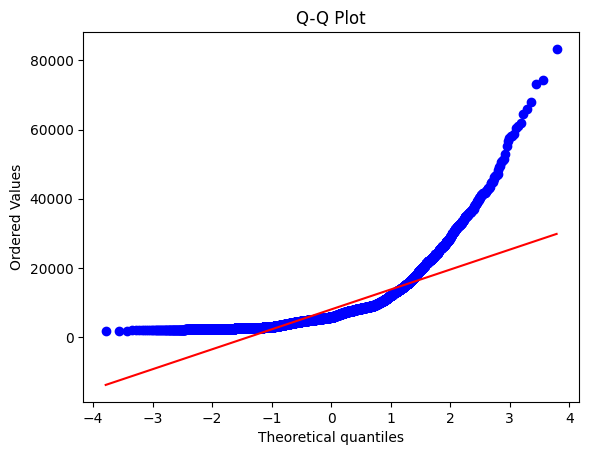

In [123]:
# Using Q-Q Plot
probplot(data['CLV'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

__Due to the data not being normally distributed, non-parametric tests will be carried out__

## Non-Parametric Test

__Which tests will be used for each column?__

In [124]:
# Initialize lists for Kruskal and Mann-Whitney U Test
kruskal_columns = [col for col in cat_col if cat_col[col].nunique() > 2]
mannwhitney_columns = [col for col in cat_col if cat_col[col].nunique() <= 2]

# Print the results
print("Kruskal:", kruskal_columns)
print("Mann-Whitney U Test:", mannwhitney_columns)

Kruskal: ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Size', 'Number of Policies', 'Number of Open Complaints', 'month_name']
Mann-Whitney U Test: ['Response', 'Gender']


In [125]:
# Mann-Whitney U Test Function for columns with 2 or lesser unique values

In [126]:
from scipy.stats import mannwhitneyu

def analyze_clv_by_category(df, category_col, target_col='CLV'):
    # Get unique values in the categorical column
    unique_values = df[category_col].unique()
    
    if len(unique_values) != 2:
        raise ValueError("The categorical variable must have exactly 2 unique values for the Mann-Whitney U Test.")
    
    # Perform Mann-Whitney U Test
    group1 = df[df[category_col] == unique_values[0]][target_col]
    group2 = df[df[category_col] == unique_values[1]][target_col]
    test_result = mannwhitneyu(group1, group2)
    p_value = test_result.pvalue
    print(f'Mann-Whitney U Test result: {test_result}')
    
    # Determine if the null hypothesis is accepted or rejected
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the groups.")
    
    # Create a combined DataFrame for plotting
    combined_df = df[df[category_col].isin(unique_values)]
    
    # Create a displot with hue
    sns.displot(data=combined_df, x=target_col, hue=category_col, kind="kde", fill=True)
    
    # Add titles and labels
    plt.title(f'Distribution of {target_col} by {category_col}')
    plt.xlabel(target_col)
    plt.ylabel('Density')
    
    # Show the plot
    plt.show()

In [127]:
# Response

Mann-Whitney U Test result: MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)
Fail to reject the null hypothesis: There is no significant difference between the groups.


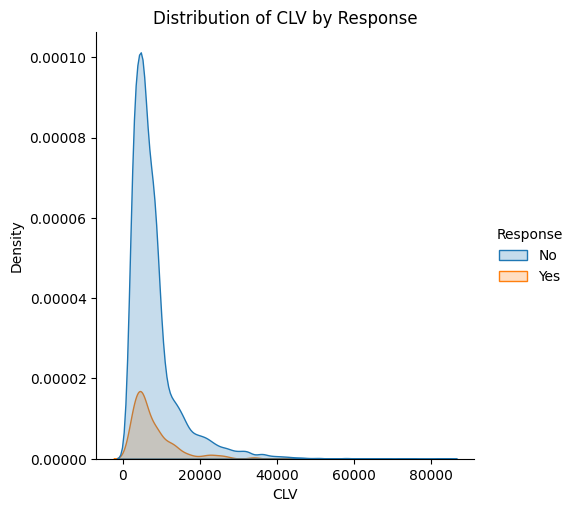

In [128]:
analyze_clv_by_category(data, 'Response')

Mann-Whitney U Test result: MannwhitneyuResult(statistic=10512074.0, pvalue=0.48749303056449833)
Fail to reject the null hypothesis: There is no significant difference between the groups.


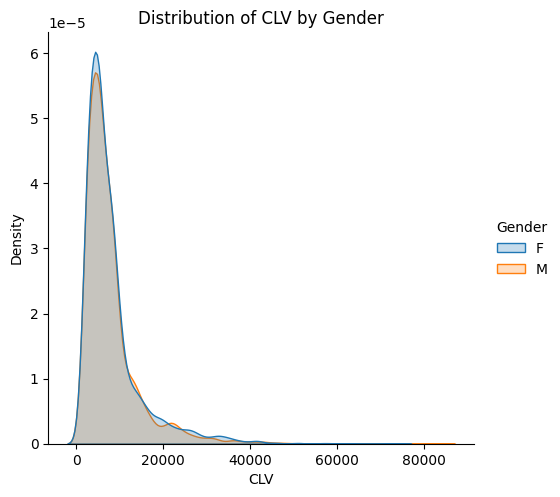

In [129]:
analyze_clv_by_category(data, 'Gender')

__We test above two features with non-Paramteric unpaired ttest and we concluded that those 2 features is not significant to predict traget__

In [130]:
# Kruskal Wallis for columns with more than 2 unique features

In [131]:
# Kruskal Wallis Test Function

from scipy.stats import kruskal

def analyze_clv_by_kruskal(df, category_col, target_col='CLV'):
    # Get unique values in the categorical column
    unique_values = df[category_col].unique()
    
    if len(unique_values) <= 2:
        raise ValueError("The categorical variable must have more than 2 unique values for the Kruskal-Wallis test.")
    
    # Separate the data based on the categorical column
    groups = [df[df[category_col] == value][target_col] for value in unique_values]
    
    # Perform Kruskal-Wallis test
    test_result = kruskal(*groups)
    print(f'Kruskal-Wallis Test result: {test_result}')
    
    # Determine if the null hypothesis is accepted or rejected
    p_value = test_result.pvalue
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the groups.")
    
    # Plot the distributions
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=category_col, y=target_col, data=df)
    plt.title(f'Box Plot of {target_col} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel(target_col)
    plt.show()

In [146]:
from scipy.stats import kruskal

def analyze_clv_by_kruskal(df, cat_col_df, target_col='CLV'):
    p_values = []
    
    for category_col in cat_col_df.columns:
        unique_values = df[category_col].unique()
        
        if len(unique_values) <= 2:
            print(f"Skipping {category_col}: The categorical variable must have more than 2 unique values for the Kruskal-Wallis test.")
            continue
        
        # Separate the data based on the categorical column
        groups = [df[df[category_col] == value][target_col] for value in unique_values]
        
        # Perform Kruskal-Wallis test
        test_result = kruskal(*groups)
        p_value = test_result.pvalue
        
        # Determine if the null hypothesis is accepted or rejected
        if p_value < 0.05:
            hypothesis_result = "Reject the null hypothesis: Significant difference between groups."
        else:
            hypothesis_result = "Fail to reject the null hypothesis: No significant difference between groups."
        
        # Append the results to the list
        p_values.append({
            'Category': category_col,
            'P-Value': p_value,
            'Hypothesis Result': hypothesis_result
        })
        
        # Plot the distributions
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=category_col, y=target_col, data=df)
        plt.title(f'Box Plot of {target_col} by {category_col}')
        plt.xlabel(category_col)
        plt.ylabel(target_col)
        plt.show()
    
    # Convert the results to a DataFrame
    p_values_df = pd.DataFrame(p_values)
    return p_values_df

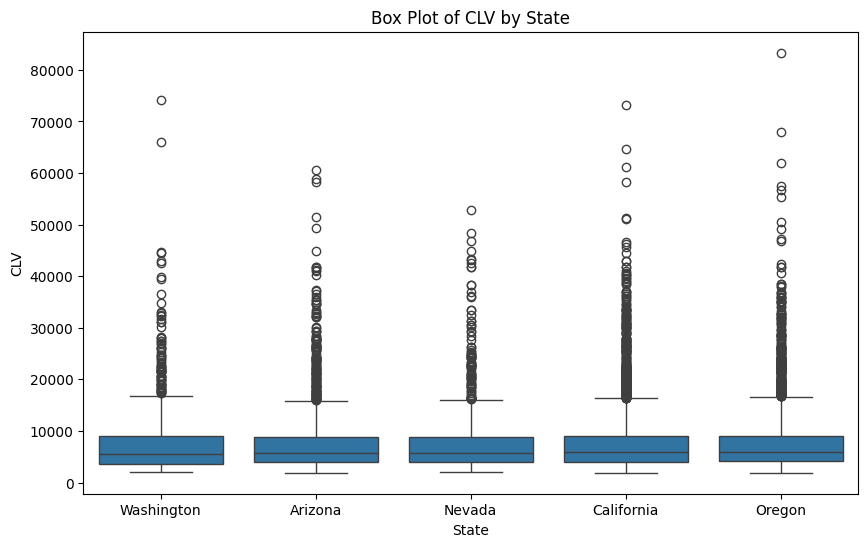

Skipping Response: The categorical variable must have more than 2 unique values for the Kruskal-Wallis test.


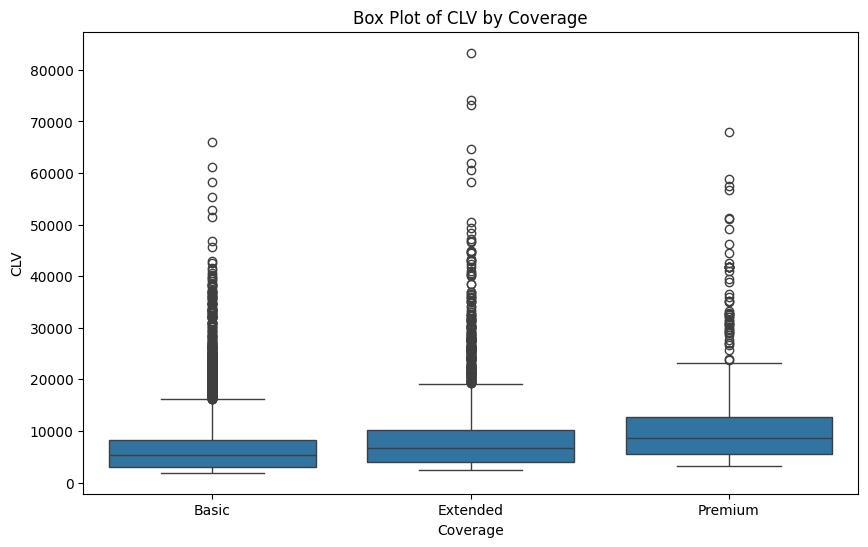

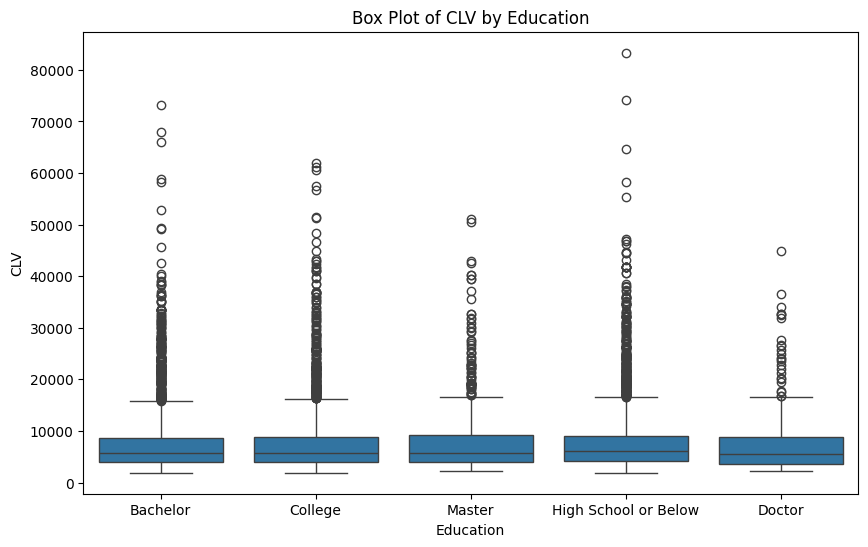

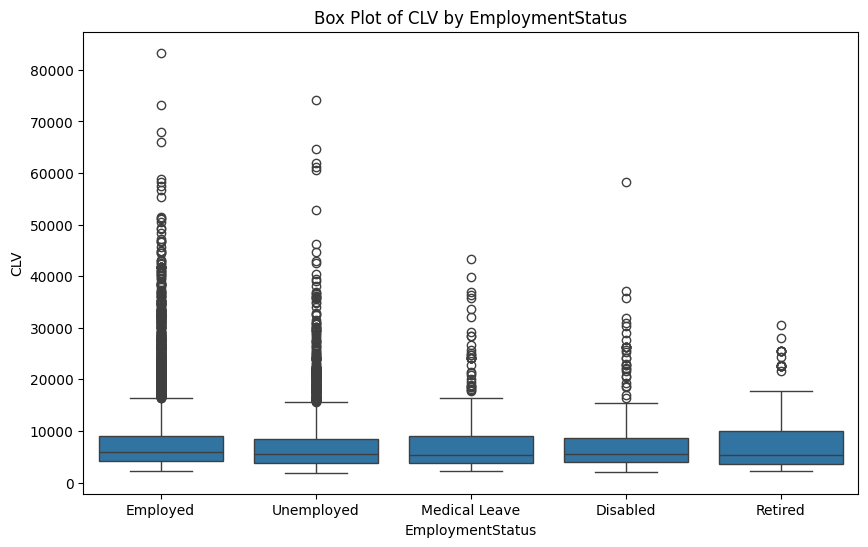

Skipping Gender: The categorical variable must have more than 2 unique values for the Kruskal-Wallis test.


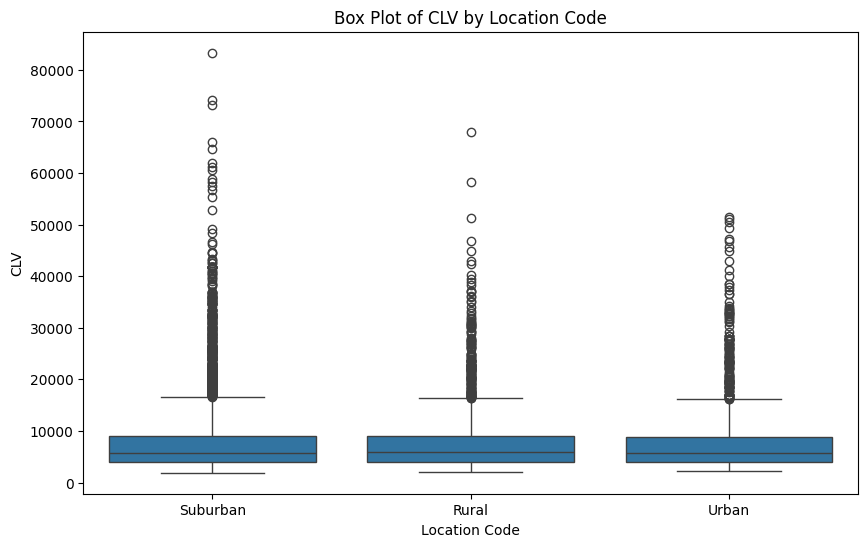

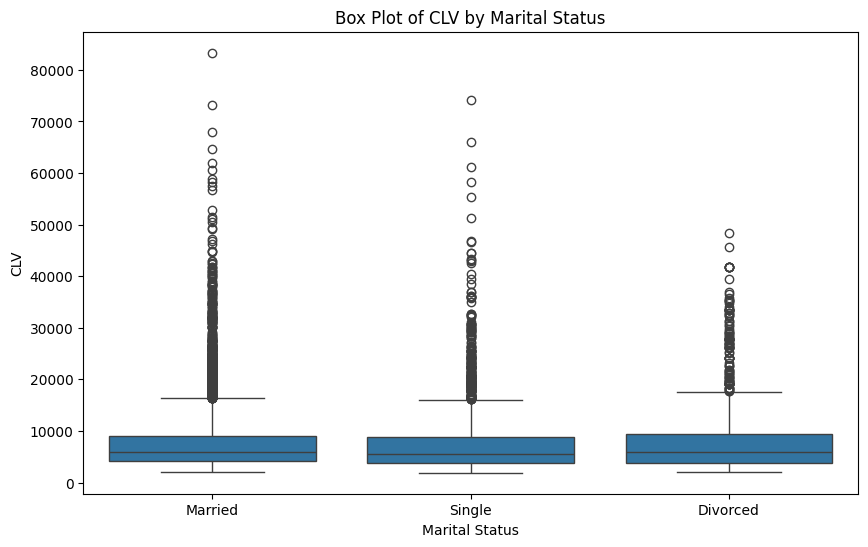

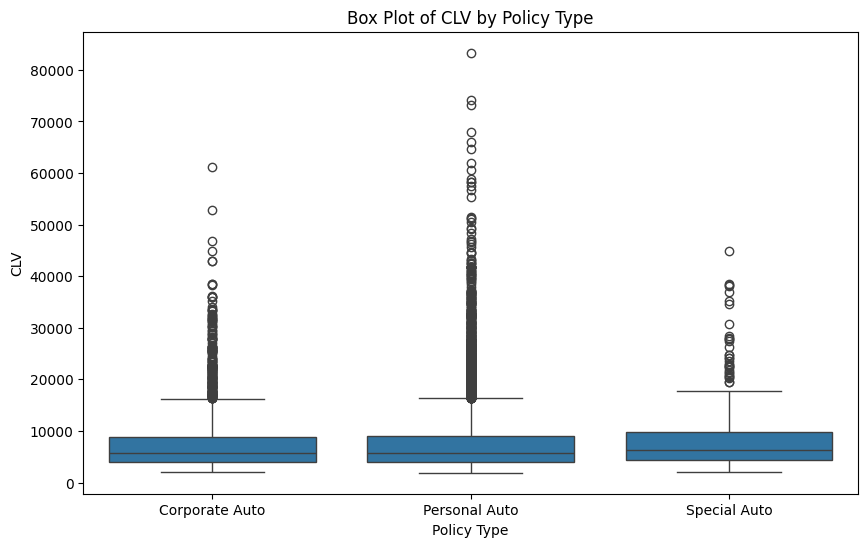

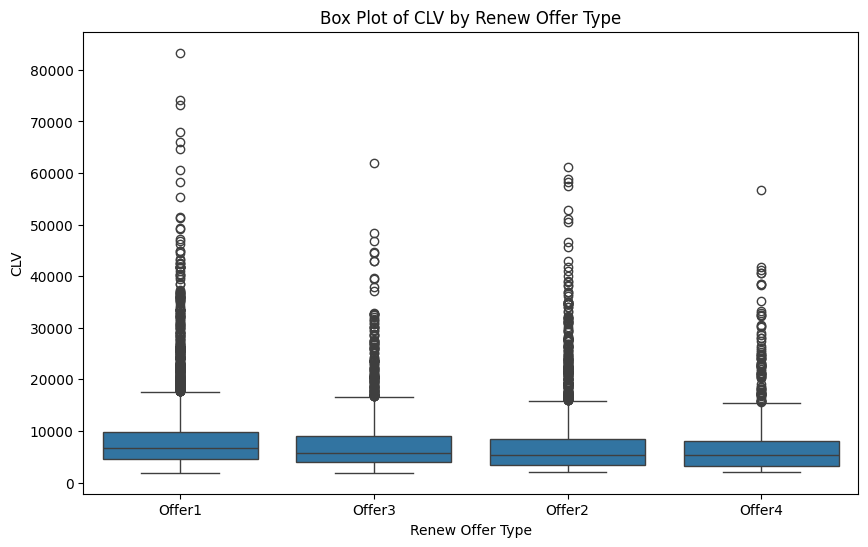

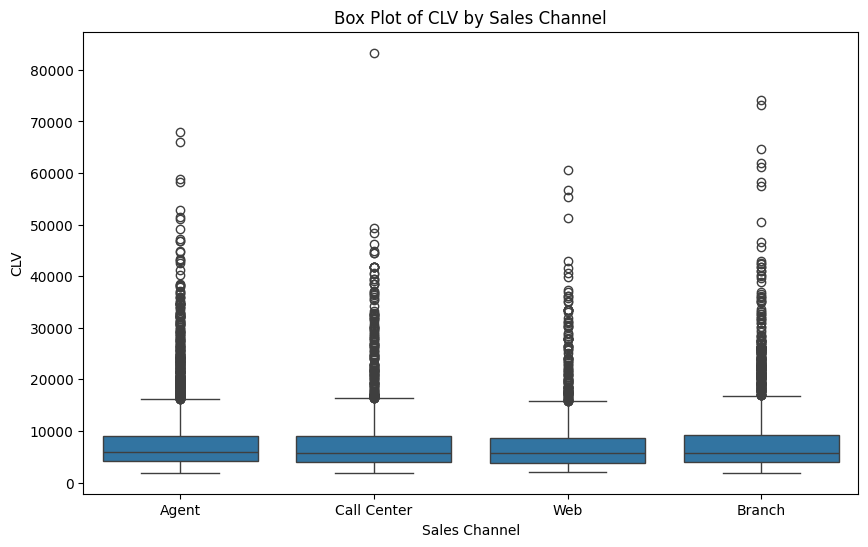

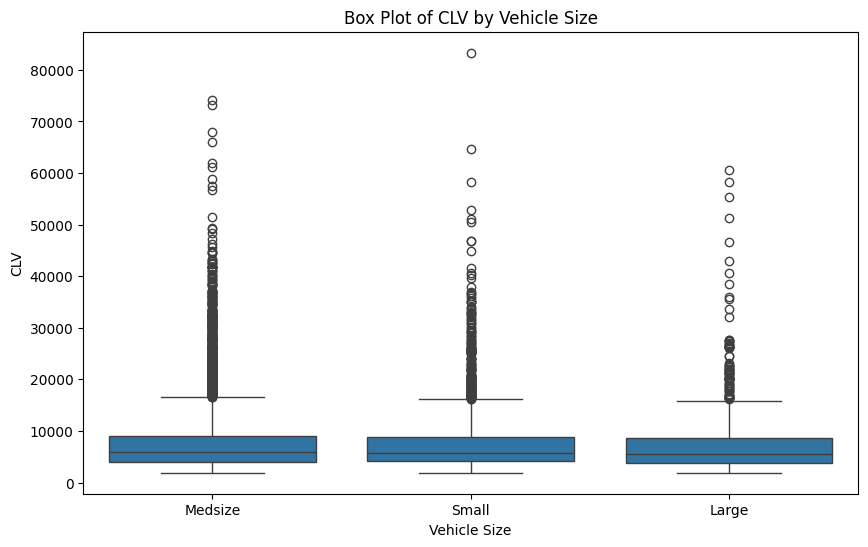

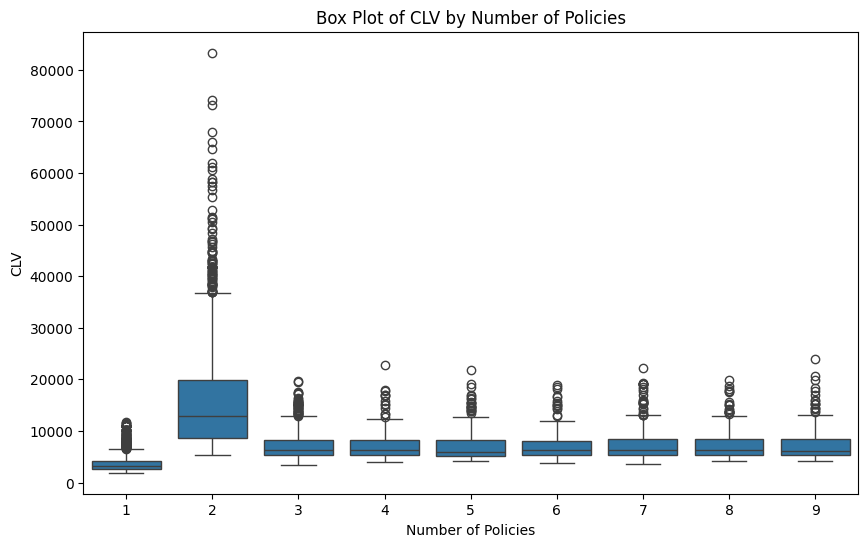

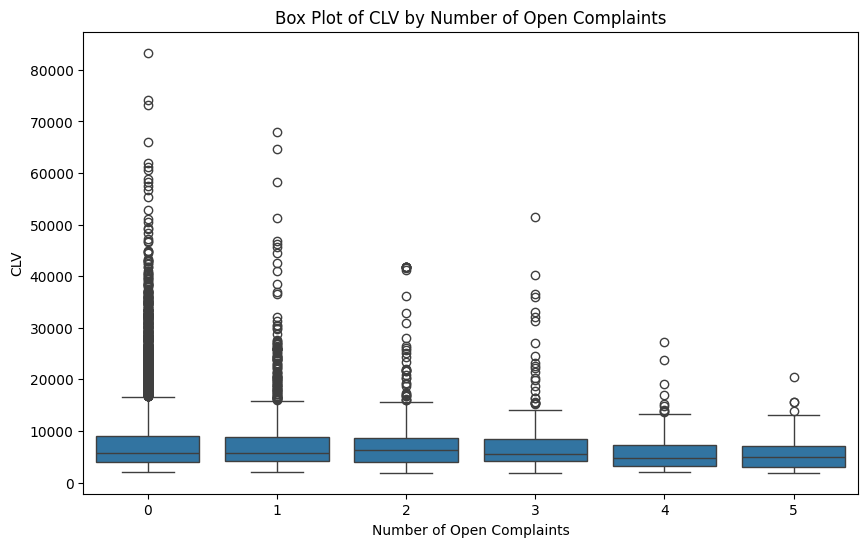

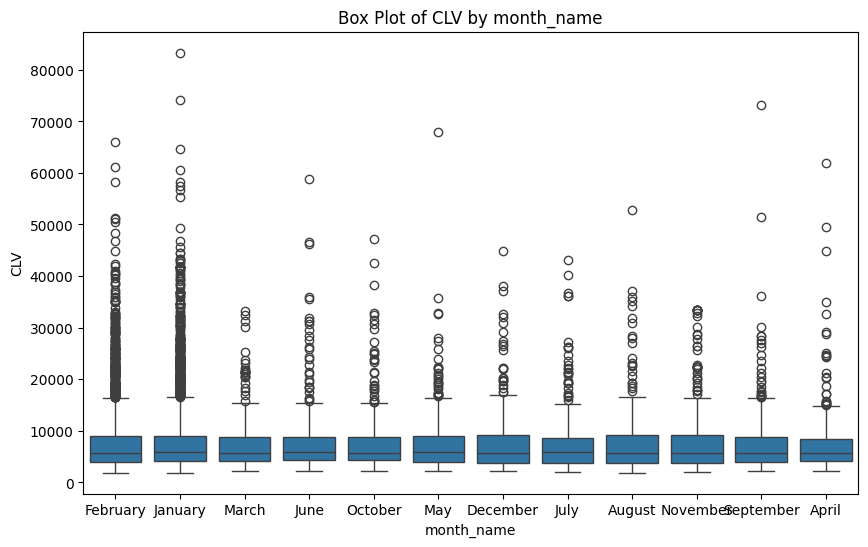

In [148]:
p_values_df = analyze_clv_by_kruskal(data, cat_col)

In [149]:
p_values_df

,Category,P-Value,Hypothesis Result
0,State,2.799823e-01,Fail to reject the null hypothesis: No signifi...
1,Coverage,7.648853e-110,Reject the null hypothesis: Significant differ...
2,Education,1.569300e-02,Reject the null hypothesis: Significant differ...
3,EmploymentStatus,1.275846e-08,Reject the null hypothesis: Significant differ...
4,Location Code,2.917346e-01,Fail to reject the null hypothesis: No signifi...
5,Marital Status,2.900915e-05,Reject the null hypothesis: Significant differ...
6,Policy Type,9.988365e-02,Fail to reject the null hypothesis: No signifi...
7,Renew Offer Type,2.196145e-36,Reject the null hypothesis: Significant differ...
8,Sales Channel,2.130272e-01,Fail to reject the null hypothesis: No signifi...
9,Vehicle Size,8.375053e-03,Reject the null hypothesis: Significant differ...


In [156]:
# Drop month_name

In [157]:
cat_col.drop('month_name', axis = 1, inplace = True)

In [150]:
# Filter for significant results
significant_p_values_df = p_values_df[p_values_df['P-Value'] < 0.05]

significant_p_values_df

,Category,P-Value,Hypothesis Result
1,Coverage,7.648853e-110,Reject the null hypothesis: Significant differ...
2,Education,1.569300e-02,Reject the null hypothesis: Significant differ...
3,EmploymentStatus,1.275846e-08,Reject the null hypothesis: Significant differ...
5,Marital Status,2.900915e-05,Reject the null hypothesis: Significant differ...
7,Renew Offer Type,2.196145e-36,Reject the null hypothesis: Significant differ...
9,Vehicle Size,8.375053e-03,Reject the null hypothesis: Significant differ...
10,Number of Policies,0.000000e+00,Reject the null hypothesis: Significant differ...
11,Number of Open Complaints,2.156441e-05,Reject the null hypothesis: Significant differ...


## Data Preprocessing

In [184]:
num_col.drop(['Number of Open Complaints','Number of Policies'], axis=1, inplace=True)
num_col.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [185]:
cat_col.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Size,Number of Policies,Number of Open Complaints
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Medsize,1,0
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Medsize,8,0
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Medsize,2,0
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,Medsize,7,0
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Medsize,1,0


In [186]:
# One-Hot Encoding for categorical features
cat_dum = pd.get_dummies(cat_col, drop_first=True).astype(int)
cat_dum.head()

,Number of Policies,Number of Open Complaints,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Medsize,Vehicle Size_Small
0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0
2,2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [187]:
df = pd.concat([num_col, cat_dum], axis =1)
df.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Policies,Number of Open Complaints,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,6979.535903,0,94,13,42,1131.464935,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
3,7645.861827,0,106,18,65,529.881344,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0
4,2813.692575,43836,73,12,44,138.130879,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0


## **OLS Model**

In [188]:
from sklearn.model_selection import train_test_split

# Split data into features and target
X = df.drop('CLV', axis=1)
y = df['CLV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
import statsmodels.api as sm

# Add constant and check OLS report
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     49.63
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:15:23   Log-Likelihood:                -92820.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9096   BIC:                         1.860e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

__As seen above, a simple OLS model can only account for just 16.8% of the data with lot of multicollinearity problems__

__To solve the issues in this model, we use various assumptions to find a way to make the regression model better.__

## __Assumptions__

__1. Autocorrelation__: Autocorrelation can inflate the significance of predictors, making it seem like they have a stronger relationship with the dependent variable than they actually do. This can lead to incorrect conclusions about the importance of predictors. Models with autocorrelated residuals often perform poorly in out-of-sample predictions because they fail to capture the underlying structure of the data accurately.

__Using the Durbin-Watson Test__
The Durbin-Watson (DW) test is a statistical test used to detect the presence of autocorrelation in the residuals (errors) of a regression analysis. The DW test checks whether the residuals from a regression model are independent. If they are not, it suggests that the model might be missing some important information.

__Test Statistic:__

The DW statistic ranges from 0 to 4.

__d ≈ 2__: Indicates no autocorrelation.

__d < 2__: Indicates positive autocorrelation.

__d > 2__: Indicates negative autocorrelation.

In [190]:
from statsmodels.stats.stattools import durbin_watson

# Get the residuals
residuals = lin_reg.resid

# Perform Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.9954761285079345


__With a dw stat approximately 2, the model has no autocorrelation. Hence, the model passes the first assumption.__

In [191]:
# To make a plot

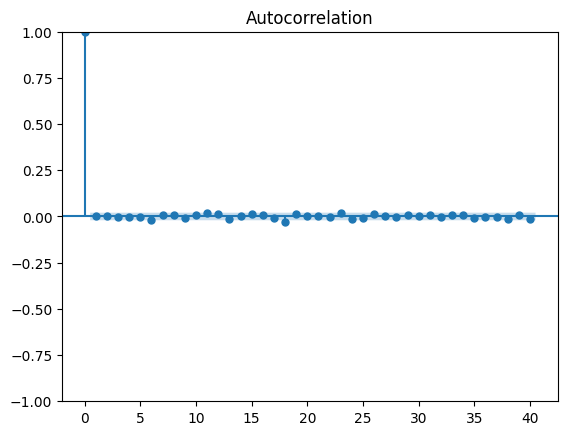

In [192]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation function
plot_acf(residuals, lags=40, alpha = 0.05)
plt.show()

__2. Normality of Residuals__: Normality of residuals can improve the predictive performance of the model. Non-normal residuals can indicate model misspecification, such as omitted variables or incorrect functional forms. 

The Jarque-Bera (JB) test is a statistical test used to determine whether a dataset follows a normal distribution by examining its skewness and kurtosis.

__How the Jarque-Bera Test Works__

__Skewness__: Measures the asymmetry of the data around the mean.

__Kurtosis__: Measures the “tailedness” of the data distribution.

__Test Statistic__: The JB test combines these two measures to form a test statistic that follows a chi-squared distribution.

In [193]:
# Using the D'Agostino and Pearson's Test

In [194]:
from scipy.stats import normaltest

# Perform D'Agostino and Pearson's test
stat, p_value = normaltest(residuals)
print(f'Statistic: {stat}, p-value: {p_value}')


Statistic: 5656.2367955161, p-value: 0.0


In [195]:
# USing Jarque-Bera Test

In [196]:
# Perform Jarque-Bera test
from scipy.stats import jarque_bera

def jarque_bera_test(data, alpha=0.05):
    """
    Perform the Jarque-Bera test for normality and return a descriptive result.

    Parameters:
    data (array-like): The data to test.
    alpha (float): Significance level (default is 0.05).

    Returns:
    str: A message indicating whether to reject or fail to reject the null hypothesis.
    """
    stat, p_value = jarque_bera(data)
    if p_value > alpha:
        return f"Fail to reject the null hypothesis (statistic = {stat:.4f}, p-value = {p_value:.4f}). The residual is normally distributed."
    else:
        return f"Reject the null hypothesis (statistic = {stat:.4f}, p-value = {p_value:.4f}). The residual is not normally distributed."

In [197]:
# Perform the modified Jarque-Bera test
result = jarque_bera_test(residuals)
print(result)

Reject the null hypothesis (statistic = 64274.0756, p-value = 0.0000). The residual is not normally distributed.


__3. Linearity of residuals__: Checking for linearity is part of the model diagnostic process. It helps in identifying whether the model is appropriate for the data or if transformations or different models are needed.

__The Rainbow Test__ is used to detect non-linearity in regression models. It compares the fit of the model using the full sample to the fit using a central subset of the data. The null hypothesis is that the model fits the full sample as well as it fits the central subset. If the null hypothesis is rejected, it suggests non-linearity.

In [198]:
# Using graphical methods

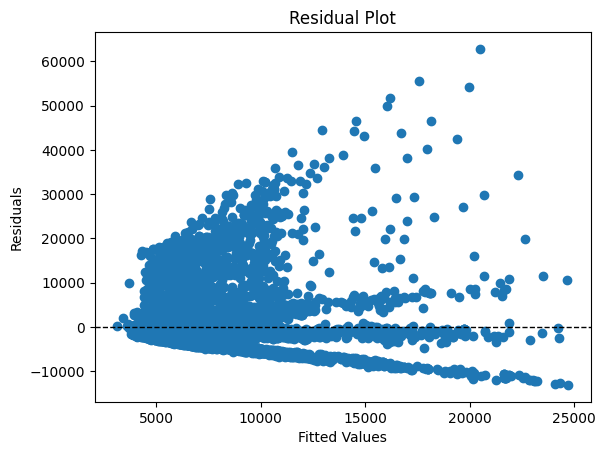

In [199]:
# Plot residuals vs fitted values
plt.scatter(lin_reg.fittedvalues, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [200]:
# Using the rainbow test

In [201]:
from statsmodels.stats.diagnostic import linear_rainbow

def rainbow_test(model, alpha=0.05):
    """
    Perform the Rainbow test for linearity and return a descriptive result.

    Parameters:
    model (statsmodels OLS object): The fitted OLS model.
    alpha (float): Significance level (default is 0.05).

    Returns:
    str: A message indicating whether to reject or fail to reject the null hypothesis.
    """
    rainbow_stat, rainbow_p_value = linear_rainbow(model)
    if rainbow_p_value > alpha:
        return f"Fail to reject the null hypothesis (p-value = {rainbow_p_value:.4f}). The model is linear."
    else:
        return f"Reject the null hypothesis (p-value = {rainbow_p_value:.4f}). The model may not be linear."

In [202]:
# Perform the modified Rainbow test
result = rainbow_test(lin_reg)
print(result)

Fail to reject the null hypothesis (p-value = 0.3344). The model is linear.


__4. Homoscedasticity_test__: Homoscedasticity ensures that the model fits the data well and provides accurate predictions. Heteroscedasticity can indicate that the model is not capturing all the patterns in the data, leading to poor predictive performance.

__The Breusch-Pagan Test__

The Breusch-Pagan test is used to determine whether heteroscedasticity is present in a regression model. It tests the null hypothesis that the residuals have constant variance (homoscedasticity) against the alternative hypothesis that the residual variance depends on the independent variables (heteroscedasticity)

In [203]:
# Using het_breuschpagan

In [204]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(lin_reg.resid, lin_reg.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 550.1089404956543, 'p-value': 1.2244343510396125e-92, 'f-value': 15.75481230705697, 'f p-value': 6.825638383440921e-96}


In [205]:
def breusch_pagan_test(model, alpha=0.05):
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    p_value = bp_test[1]
    if p_value > alpha:
        return f"Fail to reject the null hypothesis (p-value = {p_value:.4f}). Homoscedasticity is present."
    else:
        return f"Reject the null hypothesis (p-value = {p_value:.4f}). Heteroscedasticity is present."

In [206]:
# Perform the modified Breusch-Pagan test
result = breusch_pagan_test(lin_reg)
print(result)

Reject the null hypothesis (p-value = 0.0000). Heteroscedasticity is present.


The regression model is __heteroscedastic__. Hence, a log transformation will be carried out on the target variable

__i.e. y = np.log(y)__

__5. Multi Collinearity__: When predictors are highly correlated, it becomes difficult to interpret the coefficients. The model may not be able to distinguish the individual effects of correlated predictors, leading to misleading conclusions

__Using Variance Inflation Factor__

VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value of 1 indicates no correlation between a predictor and the other predictors, while higher values indicate increasing levels of multicollinearity.

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,3.178999
Monthly Premium Auto,2.878080
Months Since Last Claim,1.008431
Months Since Policy Inception,1.019406
Total Claim Amount,4.375062
Number of Policies,1.017073
Number of Open Complaints,1.007722
State_California,1.873396
State_Nevada,1.377319
State_Oregon,1.810989


In [208]:
# Logarithm transformation on target variable

In [211]:
from sklearn.model_selection import train_test_split

# Picking variables and log of target variable
X=df.drop(['CLV'],axis=1)
y=df['CLV']          
y =np.log(y)

# train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Model Building

### Picking the best Regression model

In [212]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE':mae, 'RMSE': rmse, 'R-squared': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE      RMSE  R-squared
Linear Regression  0.448401  0.576050   0.250583
Lasso Regression   0.449104  0.581601   0.236072
Ridge Regression   0.448396  0.576047   0.250593
Decision Tree      0.106241  0.267241   0.838710
Random Forest      0.089903  0.196773   0.912555


__RMSE (Root Mean Squared Error): Lower values indicate better model performance.__

__R-squared: Values closer to 1 indicate better model performance.__

__Hence, Random Forest is preferrable for the model building.__

In [213]:
# Using Recursive Elimination to remove features

In [214]:
import pandas as pd
import statsmodels.api as sm

# Initialize the list of columns
selected_features = list(X.columns)

# Set a threshold for p-values
p_value_threshold = 0.05

while len(selected_features) > 0:
    # Add a constant term for the intercept
    X_with_const = sm.add_constant(X[selected_features])
    
    # Fit the model
    model = sm.OLS(y, X_with_const).fit()
    
    # Get the p-values for the features
    p_values = model.pvalues[1:]  # Exclude the intercept
    
    # Find the feature with the maximum p-value
    max_p_value = p_values.max()
    feature_with_max_p_value = p_values.idxmax()
    
    # Check if the maximum p-value is above the threshold
    if max_p_value > p_value_threshold:
        selected_features.remove(feature_with_max_p_value)
    else:
        break

In [215]:
selected_features

['Monthly Premium Auto',
 'Number of Policies',
 'Number of Open Complaints',
 'Coverage_Extended',
 'Education_High School or Below',
 'EmploymentStatus_Employed',
 'Marital Status_Single',
 'Policy Type_Special Auto',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4']

In [216]:
# Create X_new

In [217]:
X_new = X[selected_features]
X_constant_new=sm.add_constant(X_new)

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant_new.values, i) for i in range(X_constant_new.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_new.columns)

,vif
Monthly Premium Auto,1.052582
Number of Policies,1.010524
Number of Open Complaints,1.004968
Coverage_Extended,1.041300
Education_High School or Below,1.011951
EmploymentStatus_Employed,1.144160
Marital Status_Single,1.109797
Policy Type_Special Auto,1.000380
Renew Offer Type_Offer2,1.283924
Renew Offer Type_Offer3,1.185321


In [219]:
# Using X_new

In [220]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.20,random_state=42)

In [221]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7307, 11)
(7307,)
(1827, 11)
(1827,)


In [222]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [223]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X_new.columns
feature_importances = pd.Series(importances, index=feature_names)

# Sort feature importances
feature_importances = feature_importances.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importances)

Feature Importances:
Number of Policies                0.687495
Monthly Premium Auto              0.257032
EmploymentStatus_Employed         0.011159
Number of Open Complaints         0.009939
Education_High School or Below    0.007926
Marital Status_Single             0.006581
Renew Offer Type_Offer2           0.006034
Renew Offer Type_Offer3           0.004309
Coverage_Extended                 0.003957
Renew Offer Type_Offer4           0.003484
Policy Type_Special Auto          0.002086
dtype: float64


<Axes: >

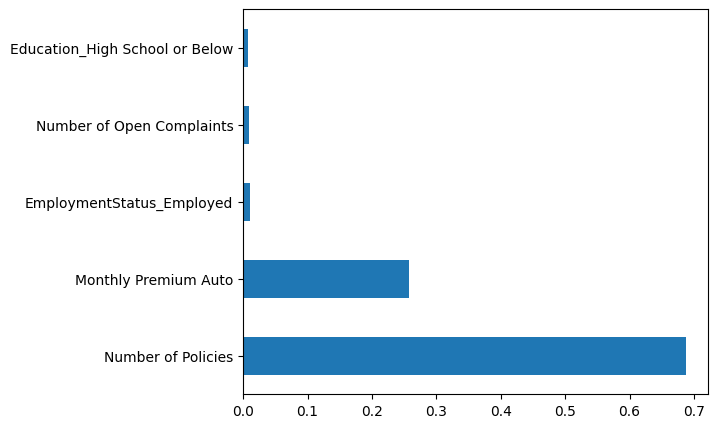

In [224]:
feature_importances.nlargest(5).plot(kind='barh',
                            figsize=(6,5))

__Number of Policies and Monthly Premium Auto are the most important features in predicting CLV__

## Parameter Grid

In [225]:
# Parameter grid search

In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
params = {
    'max_depth': [10, 20, 30],
    'n_estimators': [100, 200, 50],
    'bootstrap': [True, False],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV with error_score='raise'
grid = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, return_train_score=True, error_score='raise')

# Fit the model
try:
    grid.fit(X_train, y_train)
except Exception as e:
    print("Error during fitting:", e)

In [227]:
# Get the best parameters
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'n_estimators': 200}


In [228]:
# Build the model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Accuracy assessment
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.10065611832426652


In [229]:
y_pred

array([8.35688832, 8.62735476, 8.23991816, ..., 8.43952485, 7.71017134,
       9.87561874])

In [230]:
y_test.head(3)

708     8.348214
47      8.615108
3995    8.244891
Name: CLV, dtype: float64

In [231]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0427242349842528


In [232]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9035112145049454


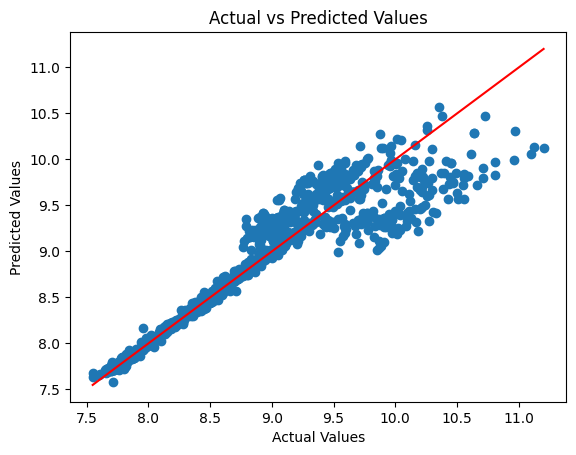

In [233]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()

In [236]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

# Evaluate on training set
y_train_pred = best_rf.predict(X_train)

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = best_rf.predict(X_test)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Determine if the model is overfitted, underfitted, or balanced
def check_model_fit(train_metric, test_metric, threshold=0.05):
    if train_metric > test_metric + threshold:
        return "Overfitted"
    elif test_metric > train_metric + threshold:
        return "Underfitted"
    else:
        return "Balanced"

fit_status = {
    'R-squared': check_model_fit(train_r2, test_r2),
    'RMSE': check_model_fit(train_rmse, test_rmse),
    'MAE': check_model_fit(train_mae, test_mae),
    'MSE': check_model_fit(train_mse, test_mse)
}

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Training': [train_r2, train_rmse, train_mae, train_mse],
    'Test': [test_r2, test_rmse, test_mae, test_mse],
    'Fit Status': [fit_status['R-squared'], fit_status['RMSE'], fit_status['MAE'], fit_status['MSE']]
}, index=['R-squared', 'RMSE', 'MAE', 'MSE'])

results_df

,Training,Test,Fit Status
R-squared,0.928778,0.903511,Balanced
RMSE,0.173358,0.206698,Balanced
MAE,0.084122,0.100656,Balanced
MSE,0.030053,0.042724,Balanced


In [237]:
y_test_pred

array([8.35688832, 8.62735476, 8.23991816, ..., 8.43952485, 7.71017134,
       9.87561874])

In [238]:
X_test = X_test.reset_index()
X_test.head()

,index,Monthly Premium Auto,Number of Policies,Number of Open Complaints,Coverage_Extended,Education_High School or Below,EmploymentStatus_Employed,Marital Status_Single,Policy Type_Special Auto,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4
0,708,106,1,0,0,1,1,0,0,1,0,0
1,47,71,4,0,0,1,1,1,0,0,0,1
2,3995,94,1,0,1,0,1,0,0,1,0,0
3,1513,99,5,1,1,0,1,0,0,0,0,0
4,3686,69,2,0,0,1,0,0,0,0,0,0


In [239]:
X_test.drop(columns='index', inplace=True)

In [241]:
X_test['CLV'] = y_pred.tolist()
X_test.to_csv('clv_pred.csv')
print("Predictions saved to clv_pred.csv")

Predictions saved to clv_pred.csv


<div style="text-align: center;">
    <img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExNmxvc2IwbWY5bzhiZGtoMWV3bjkxNGhxNjM2aWxtYzI4b3g0dGZndSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/g6cu7p2w19woY8H6ud/giphy.webp" alt="CLV" style="width: 300px;" />
</div>